# _L’état de la sécurité alimentaire dans le monde en 2013_ 

                                            # Kaëlig Barillet
                                            # Jonathan Begot
                                            # Laurence Berville


In [1]:
# Les packages : 
import pandas as pd
import numpy as np
import squarify    # pip install squarify (algorithm for treemap)
import matplotlib.pyplot as plt
import seaborn as sb # couleurs
import colorcet as cc # pour avoir bcp de couleur

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
# Les Tables :
popu = pd.read_csv("FAOSTAT_2013_population.csv",
                dtype={'Valeur':np.float32},
                converters={"Code zone (M49)": str,"Note": str,"Code année": str,"Année": str, "Code Élément": str, "Code Produit": str},
                decimal='.')



Les fichiers de la population mondiale pour l’année 2013 contiennent 15 variables : 

        Le code domaine et sa traduction Domaine : ici, nous sommes dans les bilans Alimentaires. 
        Le code Zone M49 et la zone, 
        Le code Element et sa traduction Element,les deux colonnes contiennent des valeurs uniques,
        Le code produit et le produit étudié, les deux colonnes contiennent des valeurs uniques,
        Le code année et l'année. Ici 2013. Les deux colonnes contiennent des valeurs uniques,
        Les unités,
        La valeur,
        Le symbole et sa traduction avec la colonne Description du symbole.
        Et une colonne note.

In [3]:

dispoA = pd.read_csv("FAOSTAT_2013_animal.csv",
                dtype={'Valeur':np.float64},
                converters={"Code Pays": str,"Code Année": str, "Année": str,"Code Élément": str, "Code Produit": str},
                decimal='.')

dispoC= pd.read_csv("FAOSTAT_2013_cereal.csv",
                dtype={'Valeur':np.float64},
                converters={"Code Pays": str,"Code Année": str, "Année": str,"Code Élément": str, "Code Produit": str },
                decimal='.')

dispoV= pd.read_csv("FAOSTAT_2013_vegetal.csv",
                dtype={'Valeur':np.float64},
                converters={"Code Pays": str,
                            "Code Année": str,
                            "Année": str, 
                            "Code Élément": str, 
                            "Code Produit": str },
                decimal='.')




Les fichiers de disponibilité alimentaire (vegetal, animal et cereal) pour l’année 2013 contiennent 14 variables : 

     Le code domaine et sa traduction Domaine : ici, nous sommes dans les bilans Alimentaires. 
     Le code pays et le pays, 
     Le code Element et sa traduction Element,
     Le code produit et le produit étudié, 
     Le code année et l'année. Ici 2013.
     Les unités,
     La valeur,
     Le symbole et sa traduction avec la colonne Description du symbole.

Les 3 tables ont les mêmes entêtes, dans le même ordre.
La table Céreale et totalement inclus dans la table Végétaux.

In [4]:
# Observations des datas - Les différents pays étudiés : 
ListePays_A=set(dispoA["Pays"].values.tolist())
print("Nombre de pays dans la data DispoAnimal est de",len(ListePays_A))

ListePays_V=set(dispoV["Pays"].values.tolist())
print("Nombre de pays dans la data DispoVégétal est de",len(ListePays_V))

ListePays_C=set(dispoC["Pays"].values.tolist())
print("Nombre de pays dans la data DispoCéréal est de",len(ListePays_C))

# Vérification que les pays dans les 3 tables disponibilités alimentaires sont identiques
if set(ListePays_A) == set(ListePays_V) == set(ListePays_C):
    print("Les pays sont identiques dans les 3 dataframes : Cereal / Animal et Vegetal")
else:
    print("Les listes sont différentes")

Nombre de pays dans la data DispoAnimal est de 175
Nombre de pays dans la data DispoVégétal est de 175
Nombre de pays dans la data DispoCéréal est de 175
Les pays sont identiques dans les 3 dataframes : Cereal / Animal et Vegetal


             Valeur
count  2.350000e+02
mean   3.683382e+04
std    1.561302e+05
min    5.740000e-01
25%    4.015375e+02
50%    5.414739e+03
75%    2.059915e+04
max    1.407321e+06


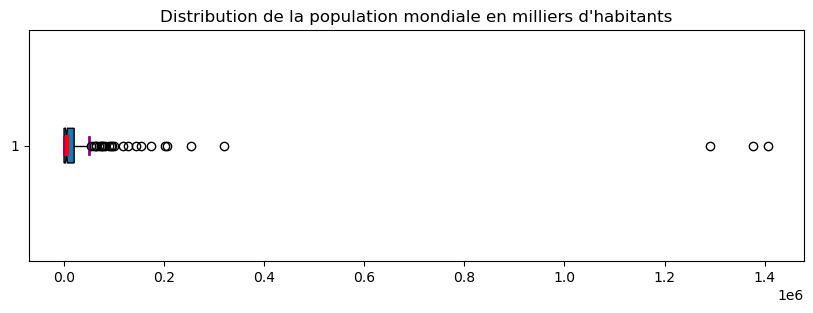

In [5]:
# Statistiques descriptives : 

summary_across_rows = pd.DataFrame(popu).describe()
print(summary_across_rows )

fig = plt.figure(figsize =(10, 3))# taille du graphique
bp=plt.boxplot(popu['Valeur'],
            patch_artist = True,
            notch ='True', vert = 0) # boite à moustache
plt.title("Distribution de la population mondiale en milliers d'habitants")# Titre
for cap in bp['caps']: # pour personnaliser les caps
    cap.set(color ='#8B008B',
            linewidth = 2)
for median in bp['medians']: # changer les couleurs de la médiane
    median.set(color ='red',
                linewidth = 3) # et l'épaisseur
plt.show()# afficher le graphique 


On note la présence de 3 "outliers". 

In [7]:
# Data alimentaires : 

summary_across_rowsA = pd.DataFrame(dispoA).describe()
print(summary_across_rowsA )

summary_across_rowsC = pd.DataFrame(dispoC).describe()
print(summary_across_rowsC)

summary_across_rowsV = pd.DataFrame(dispoV).describe() 
print(summary_across_rowsV)


              Valeur
count   37166.000000
mean      148.291647
std      1933.728473
min     -1368.000000
25%         0.000000
50%         1.000000
75%        11.000000
max    135600.000000
              Valeur
count   16057.000000
mean      608.890108
std      6947.381722
min    -39863.000000
25%         0.000000
50%         3.000000
75%        54.620000
max    353699.000000
              Valeur
count  104871.000000
mean      321.271016
std      6395.039684
min    -39863.000000
25%         0.000000
50%         1.000000
75%        17.000000
max    739267.000000


On note la présence de chiffres négatifs.

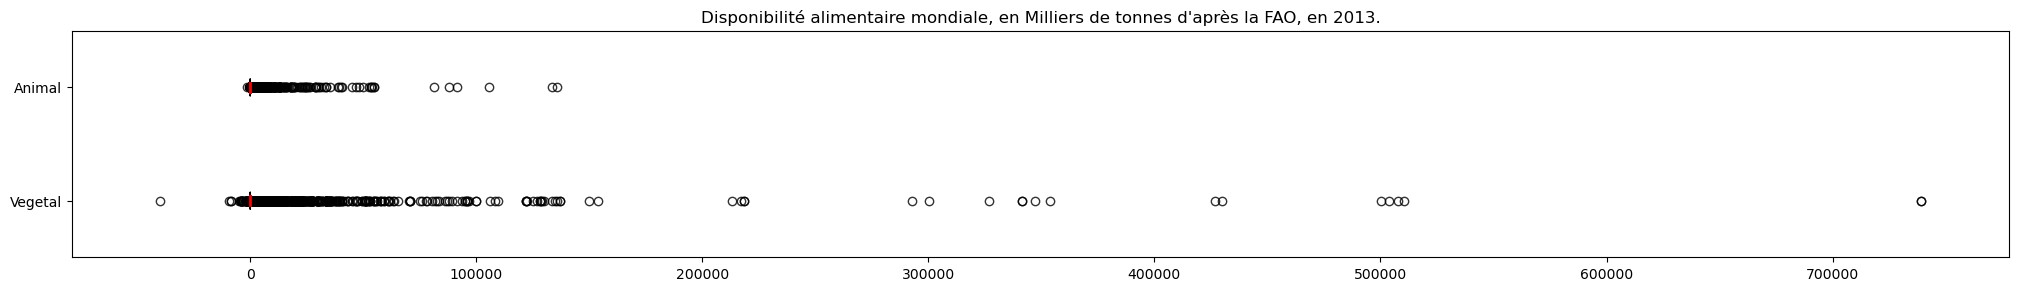

In [9]:
# Graphiques : 
data=[dispoV['Valeur'], dispoA['Valeur']] # liste des données analysées
fig=plt.figure(figsize =(25, 10)) # taille du graphique
ax=fig.add_subplot(313) # taille de chaque élement du graphique
colors=['#00FF00','#FFFF00'] # couleurs
 
bp1 = ax.boxplot(data, # nos datas
                patch_artist = True,# pour modifier les éléments de la boite à moustache
                notch ='True',
                vert = 0) # horizontal pour gagner de la place

# boucle pour changer les couleurs des boites et des écarts 
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bp1['whiskers']:
    whisker.set(color ='#8B008B', # couleur de la ligne
                linewidth = 1.5,# taille de la ligne
                linestyle =":")# ligne en .....
for cap in bp1['caps']:
    cap.set(color ='#8B008B', #couleur
            linewidth = 2)# taille du caps
for median in bp1['medians']:
    median.set(color ='red', # couleur mediane
                linewidth = 2) # taille 
for flier in bp1['fliers']:
    flier.set(marker ='o', # forme des points
              color ='#8B008B',
              alpha = 0.8) # transparence
     
# x-axis labels
ax.set_yticklabels(['Vegetal', 'Animal'])
# Adding title
plt.title("Disponibilité alimentaire mondiale, en Milliers de tonnes d'après la FAO, en 2013.")
 
# Removing top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()


In [10]:
# Question 1 : Population mondiale et duplicata de la chine

Total = popu["Valeur"].sum()
print(f'La population mondiale annoncée en 2013 était de {int(Total*1000):,},habitants. Nous notons une erreur \ncar la population mondiale est passée au dessus de 8 milliards en 2022.'.replace(',', ' '))

# Erreur avec la Chine
Chine = popu.query("Zone=='Chine'")["Valeur"] #print(type(Chine))
Chine = list(Chine)[0]
print(f'On enlève donc la chine qui est incluse deux fois dans les datas = {int(Chine*1000,):,}, habitants'.replace(',', ' '))
print(f'La population mondial en 2013 était de {int((Total - Chine)*1000):,},habitants.'.replace(',', ' '))

La population mondiale annoncée en 2013 était de 8 655 949 000 habitants. Nous notons une erreur 
car la population mondiale est passée au dessus de 8 milliards en 2022.
On enlève donc la chine qui est incluse deux fois dans les datas = 1 407 320 875  habitants
La population mondial en 2013 était de 7 248 628 125 habitants.


### Question 2 : Redondance des tables.
Redondance : 

Comme nous l'avons observé lors de l'ouverture des tables, il y a des colonnes qui donnent la même information. 
Nous allons donc simplifier le tableau :

Voici un exemple avec le Blé et la France : 

In [11]:
# création de sous tableau
FranceV=dispoV[dispoV['Pays']=='France']# Sous tableau avec que la France 
FranceBle=FranceV[FranceV['Produit']=='Blé']# Sous tableau avec que le blé de France

# J'enlève les colonnes non utiles : 
FranceBle= FranceBle.drop(columns=["Code Domaine", "Description du Symbole","Domaine",
                                   "Code Pays", "Pays","Année", "Code Produit", "Produit", "Code Année"])


In [12]:
# Puis on remarque des redondances dans les valeurs :

FrBle=FranceBle[FranceBle['Symbole']=='S']# Sous tableau avec que les données en tonnes
# J'ajoute une colonne avec la valeur en kg
FrBle['ValeurKg'] = FrBle['Valeur'] * 1000
# J'enlève Unité
FrBle= FrBle.drop(columns=["Unité"])

In [13]:
# La Disponibilite interieure est égale à (Importation - Exportation) + Production + Variation de stock
ImportationFR_Ble = list(FrBle.query("Élément=='Importations - Quantité'")["ValeurKg"])[0]
ExportationFR_Ble = list(FrBle.query("Élément=='Exportations - Quantité'")["ValeurKg"])[0]
ProductionFR_Ble = list(FrBle.query("Élément=='Production'")["ValeurKg"])[0]
DispoInt_FR_Ble = list(FrBle.query("Élément=='Disponibilité intérieure'")["ValeurKg"])[0]
Variation_FR_Ble = list(FrBle.query("Élément=='Variation de stock'")["ValeurKg"])[0]

print('ImportationFR_Ble', '-', 'ExportationFR_Ble','+','ProductionFR_Ble','+ Variation de stock','= Disponibilité intérieure' )
print('(',ImportationFR_Ble,'-', ExportationFR_Ble,') +',ProductionFR_Ble,'+', Variation_FR_Ble,'=', (ImportationFR_Ble-ExportationFR_Ble)+ProductionFR_Ble + Variation_FR_Ble )
print( 'La disponibilité intérieur en Blé =' , DispoInt_FR_Ble)

ImportationFR_Ble - ExportationFR_Ble + ProductionFR_Ble + Variation de stock = Disponibilité intérieure
( 2055000.0 - 21502000.0 ) + 38614000.0 + 1131000.0 = 20298000.0
La disponibilité intérieur en Blé = 20298000.0


In [14]:
#La Disponibilite interieure est utilisée en Nourriture + Perte + Semences + Traitement + Alimentation Animale + Autres Utilisations
NourritureFR_Ble = list(FrBle.query("Élément=='Nourriture'")["ValeurKg"])[0]
PerteFR_Ble = list(FrBle.query("Élément=='Pertes'")["ValeurKg"])[0]
SemencesFR_Ble = list(FrBle.query("Élément=='Semences'")["ValeurKg"])[0]
Traitement_FR_Ble = list(FrBle.query("Élément=='Traitement'")["ValeurKg"])[0]
AlimentationA_FR_Ble = list(FrBle.query("Élément=='Aliments pour animaux'")["ValeurKg"])[0]
AutreU_FR_Ble = list(FrBle.query("Élément=='Autres Utilisations'")["ValeurKg"])[0]

print("La Disponibilite interieure est utilisée en Nourriture + Perte + Semences + Traitement + Alimentation Animale \n + Autres Utilisations =",
      NourritureFR_Ble+PerteFR_Ble+SemencesFR_Ble+Traitement_FR_Ble+AlimentationA_FR_Ble+AutreU_FR_Ble )

La Disponibilite interieure est utilisée en Nourriture + Perte + Semences + Traitement + Alimentation Animale 
 + Autres Utilisations = 20298000.0


### Variation de stock = [(Importation - Exportation) + Production] - [Nourriture + Perte + Semences + Traitement + Alimentation Animale + Autres Utilisations ]

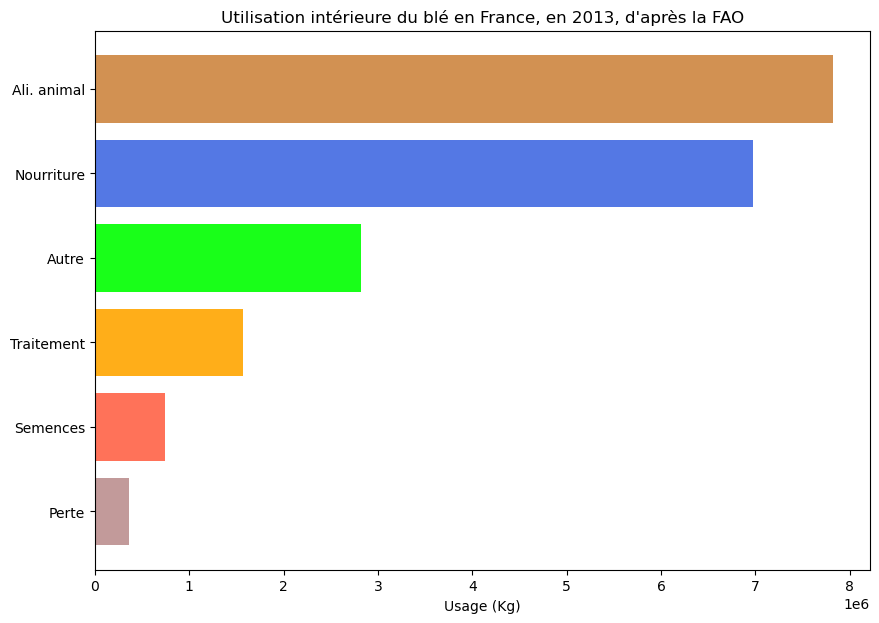

In [16]:
# Graphique en barre Horiz, sur utilisation du blé en France en 2013
# Data :
objects =('Perte','Semences','Traitement','Autre','Nourriture','Ali. animal')
y_pos = np.arange(len(objects))# taille de l'axe y
performance=[PerteFR_Ble,SemencesFR_Ble,Traitement_FR_Ble,AutreU_FR_Ble,NourritureFR_Ble,AlimentationA_FR_Ble]
color = ['rosybrown','tomato', 'orange', 'lime','royalblue', 'peru']
#Graph: 
plt.figure(figsize =(10,7)) # taille de la "feuille" (larg, hauteur)
plt.barh(y_pos, performance, 
          align='center', 
          color=color,
          alpha=0.9)
plt.yticks(y_pos, objects)# legende y (longueur et noms)
plt.xlabel('Usage (Kg)')# legence x
plt.title("Utilisation intérieure du blé en France, en 2013, d'après la FAO")# titre
plt.savefig("Utilisation intérieure du Blé_France_2013 en kg.png", dpi=500)
plt.show()

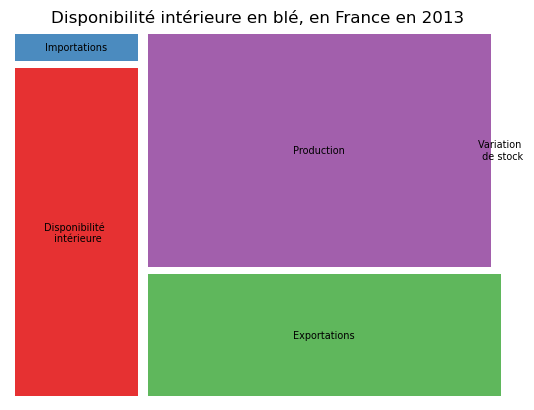

In [17]:
# Graph : Disponibilite interieur en Blé en France en 2013 :

# Data :
Variables =('Disponibilité \n intérieure','Importations','Exportations','Production','Variation \n de stock')
DisopBle=[DispoInt_FR_Ble,ImportationFR_Ble,ExportationFR_Ble,ProductionFR_Ble,Variation_FR_Ble]

# Représentation en Treemaps avec les fonctions inclues dans squarify :
squarify.plot(sizes=DisopBle,
              label=Variables, 
              color = sb.color_palette("Set1",
                                      len(DisopBle)),
              pad = 0.001,# blanc pour séparer les carrés
              #ec = 'black', #E ligne noir autour des carrés
              text_kwargs = {'fontsize': 7, 'color': 'black'}, # taille de la legende et couleur
              alpha=.9)# transparance des couleurs
plt.axis('off')
plt.title('Disponibilité intérieure en blé, en France en 2013')# rajouter un titre
plt.savefig("Squarify Disponibilité interieur du Blé_France_2013.png", dpi=500)
plt.show()

Chaque case de couleur représente un pays et sa taille est proportionnelle à la part de la population totale du monde.

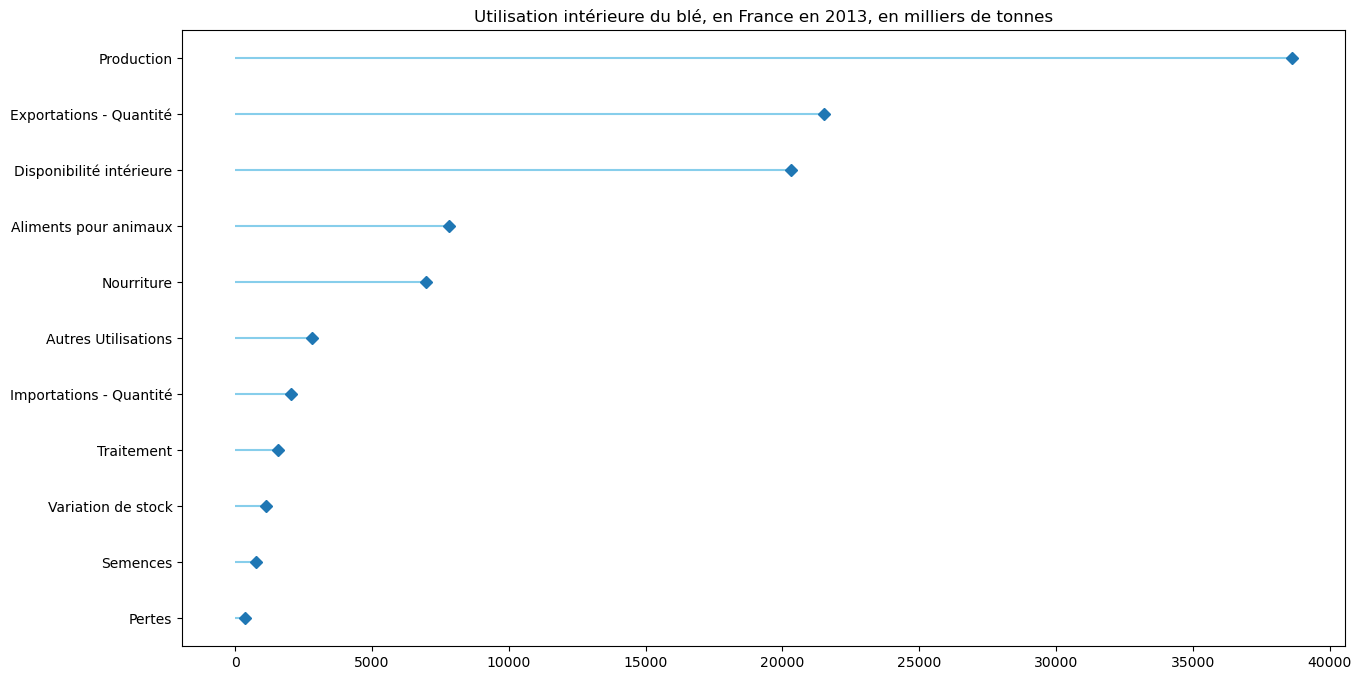

In [19]:
# # Graphique en lolipops horizontal avec l ensemble des données sur le ble francais:
plt.figure(figsize =(15, 8)) # taille de la "feuille" (larg, hauteur)
ordered_df = FrBle.sort_values(by='Valeur') # trier les données en ordre decroissant
my_range=range(1,len(FrBle.index)+1)

# Horizontal version
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Valeur'], color='skyblue')
plt.plot(ordered_df['Valeur'], my_range, "D")
plt.yticks(my_range, ordered_df['Élément'])
plt.title('Utilisation intérieure du blé, en France en 2013, en milliers de tonnes')# rajouter un titre
#plt.savefig("Utilisation intérieure du Ble_France_2013.png", dpi=500)
plt.show()


### Question 3 : Disponibilité alimentaire (calories, protéines):

In [20]:
#Question 3a : Population: 
 # enlever les cols inutiles.
PopulationM= popu.drop(columns=["Code Domaine","Code zone (M49)","Domaine","Note", "Code Élément","Élément","Description du Symbole","Symbole", "Produit","Code Produit", "Année", "Code année"])
PopulationM ['habitant'] = PopulationM['Valeur'] * 1000
PopulationM= PopulationM.drop(columns=["Valeur","Unité"])# Sous tableau avec que les habitants
PopulationM=PopulationM.rename(columns={'Zone':'Pays'})
PopulationM.set_index("Pays", inplace=True)
PopulationM = PopulationM.drop('Chine') # On enlève la Chine 

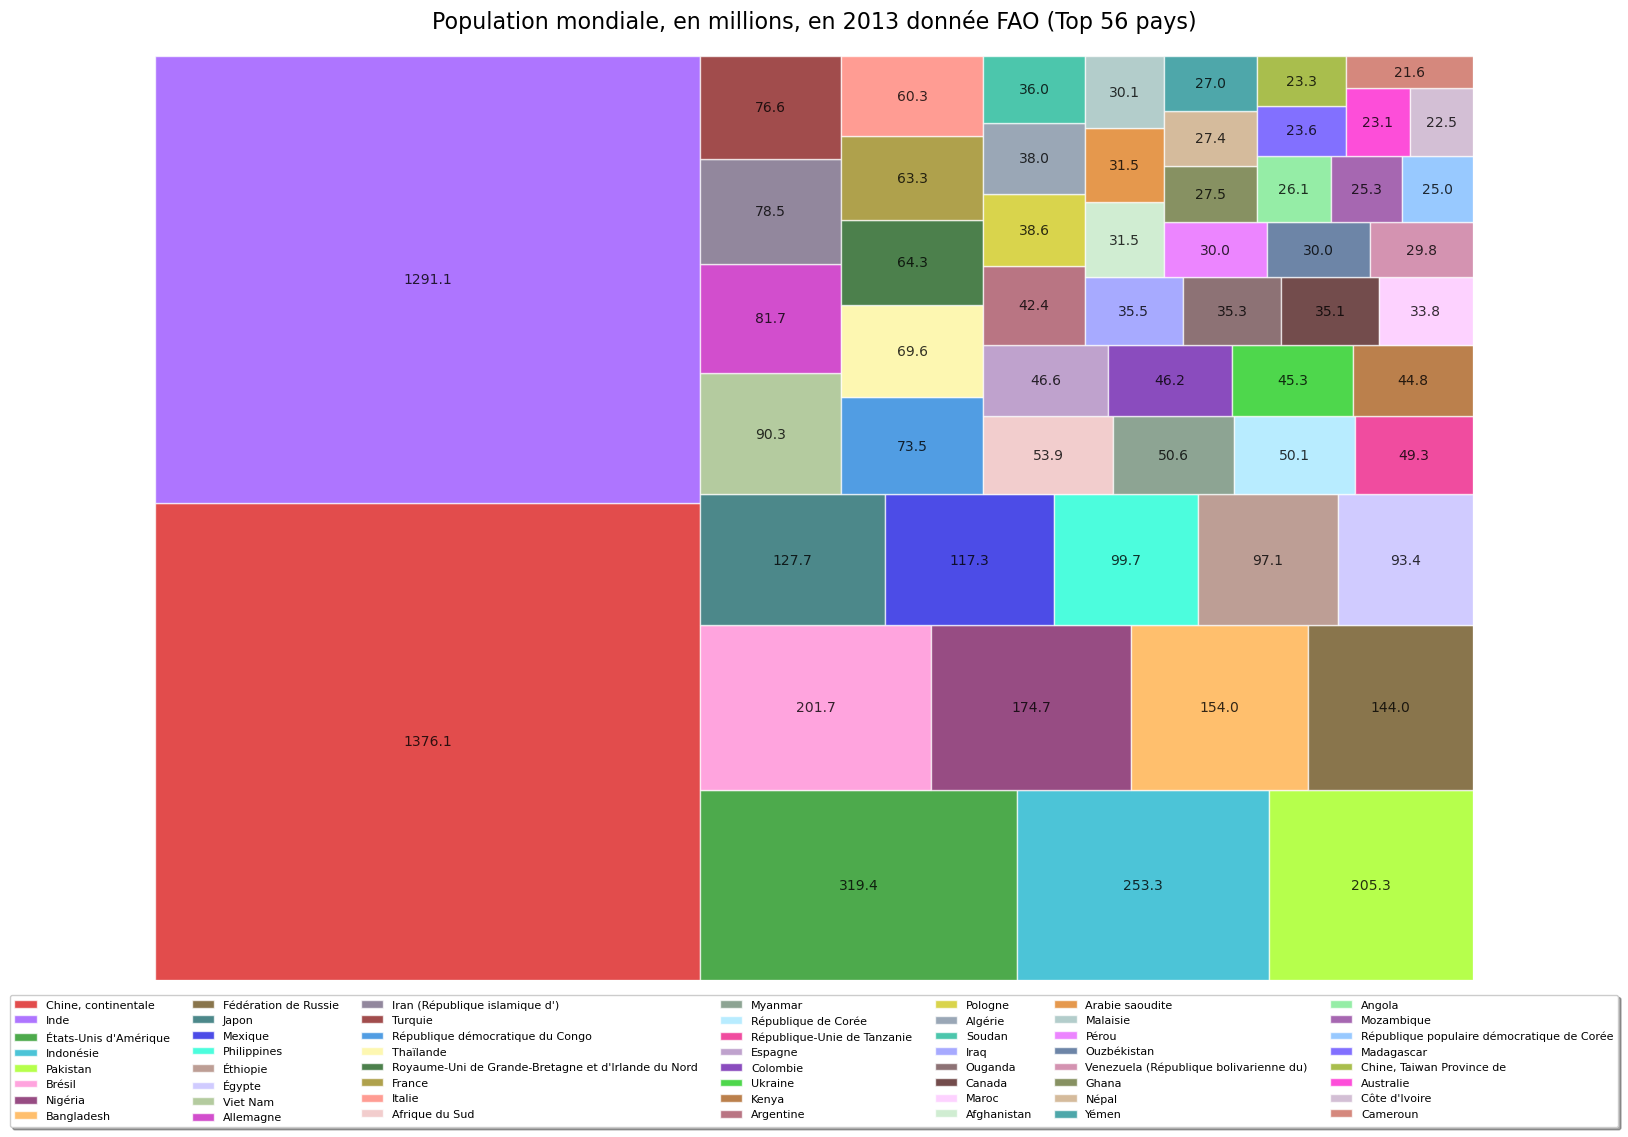

In [21]:
PopulationM['pays'] = PopulationM.index
ordered_PopulationM= PopulationM.loc[:, ["habitant","pays"]].sort_values(by="habitant", 
                                                                  ascending=False)[:56] 
# plot :
palette = sb.color_palette(cc.glasbey, n_colors=56)
plt.figure(figsize =(17, 12)) # taille de la "feuille" (larg, hauteur)
squarify.plot(sizes=ordered_PopulationM['habitant'],
              label=round((ordered_PopulationM["habitant"]/1000000),1), 
              color=palette,
              #pad = 0.001,# blanc pour séparer les carrés
              ec = 'white', #ligne autour des carrés
              text_kwargs = {'fontsize': 10, 
                              'color': 'black',
                              'alpha' :0.8 }, # taille de la legende et couleur
              alpha=.7)# transparance des couleurs
plt.legend(labels=ordered_PopulationM['pays'],
            loc="upper center",
            fontsize="8",
            ncol=7,
            fancybox=True, shadow=True,
            bbox_to_anchor=(0.5, -0.01))
plt.title(
    label='Population mondiale, en millions, en 2013 donnée FAO (Top 56 pays)', 
    fontdict={"fontsize":16},
    pad=20)
plt.axis('off')
plt.savefig("Population mondiale en millions.png", dpi=600)
plt.show()


In [22]:
# Question 3b : Population Mettre les deux tables disponibilités ensemble.

dispoV= dispoV.drop(columns=["Code Domaine","Domaine", "Description du Symbole", "Symbole","Domaine", "Code Pays", "Année",  "Code Année"])
dispoA= dispoA.drop(columns=["Code Domaine","Domaine", "Description du Symbole", "Symbole","Domaine", "Code Pays", "Année",  "Code Année"])

dispoV.set_index("Pays", inplace=True) # Passage de Pays en index
dispoV = dispoV.drop('Chine') # On enlève la Chine 
dispoV =dispoV[(dispoV.Valeur > 0)]# Que les valeures positives

dispoA.set_index("Pays", inplace=True) # Passage de Pays en index
dispoA = dispoA.drop('Chine') # On enlève la Chine 
dispoA =dispoA[(dispoA.Valeur > 0)]

In [23]:
#-----Exporter-----------------------------------------------------------------------------------------------------------
# ListeProduit_V=set(dispoV["Produit"].values.tolist())# 75 produits
# Liste_Produits_Veg = pd.DataFrame(ListeProduit_V)
# Liste_Produits_Veg.to_excel("ListeProduit _ Veg.xlsx", sheet_name="Vegetal", index=True)

# ListeProduit_A=set(dispoA["Produit"].values.tolist())#23 produits
# Liste_Produits_Ani = pd.DataFrame(ListeProduit_A)
# Liste_Produits_Ani.to_excel("ListeProduit _ Ani.xlsx", sheet_name="Animal", index=True)

In [24]:
# Concatener les tables Animal et Végétale
dispo = pd.concat([dispoA, dispoV]) 
ListeProduit=set(dispo["Produit"].values.tolist()) #98 produits
print(len(ListeProduit))
# Liste_Produits_Ani_Veg = pd.DataFrame(ListeProduit)
# Liste_Produits_Ani_Veg.to_excel("ListeProduit_ Veg et Ani.xlsx", sheet_name="Animal et Vegetal", index=True)

97


In [25]:
# Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

## Calories 
Dispo_Alimentaire_Calorie =dispo[dispo['Code Élément'] == '664'] # sous-tableau (Kcal/personne/jour) avec que les kcalorie
# J'ajoute une colonne avec la valeur en année
Dispo_Alimentaire_Calorie['Kcal/personne/an'] = Dispo_Alimentaire_Calorie['Valeur'] * 365
# Mise à jour des titres des colonnes entre les données 
Dispo_Alimentaire_Calorie=Dispo_Alimentaire_Calorie.rename(columns={'Valeur':'Kcal/personne/jour'}) # changement du nom 
Dispo_Alimentaire_Calorie= Dispo_Alimentaire_Calorie.drop(columns=["Code Élément","Élément","Unité"])

In [26]:
Dispo_Alimentaire_Proteine=dispo[dispo['Code Élément'] == '674']# sous tableau avec que les proteines
# J'ajoute une colonne avec la valeur en année
Dispo_Alimentaire_Proteine ['g/personne/an'] = Dispo_Alimentaire_Proteine['Valeur'] * 365
Dispo_Alimentaire_Proteine ['kg/personne/jour'] = Dispo_Alimentaire_Proteine['Valeur'] * 0.001
Dispo_Alimentaire_Proteine['kg/personne/an'] = Dispo_Alimentaire_Proteine['g/personne/an'] *0.001 # passage en kg
# Mise à jour des titres des colonnes entre les données 
Dispo_Alimentaire_Proteine=Dispo_Alimentaire_Proteine.rename(columns={'Valeur':'g/personne/jour'}) # changement du nom 
Dispo_Alimentaire_Proteine= Dispo_Alimentaire_Proteine.drop(columns=["Code Élément","Élément","Unité"])

In [27]:
# Fusion des tables Proteine et Population
Dispo_Alimentaire_Proteine = pd.merge(Dispo_Alimentaire_Proteine, PopulationM, on=["Pays"])
Dispo_Alimentaire_Calorie = pd.merge(Dispo_Alimentaire_Calorie, PopulationM, on=["Pays"])

Dispo_Alimentaire_Calorie['kcal/pays/2013'] = Dispo_Alimentaire_Calorie['Kcal/personne/an'] * Dispo_Alimentaire_Calorie['habitant'] # passage population de pays
Dispo_Alimentaire_Proteine ['kg/pays/2013'] =Dispo_Alimentaire_Proteine['kg/personne/an'] * Dispo_Alimentaire_Proteine['habitant'] # passage population de pays
# on notera la presence de 0 dans les produits que le pays ne produit pas

In [28]:
# Calculer par pays, l'ensemble des proteines et des kcal dispo pour les habitants : 
Dispo_Alimentaire_Calorie_Sum = Dispo_Alimentaire_Calorie.groupby('Pays').sum('kcal/pays/2013')# group by somme 
Dispo_Alimentaire_Calorie_Sum= Dispo_Alimentaire_Calorie_Sum .drop(columns=["habitant"])

Dispo_Alimentaire_Proteine_Sum = Dispo_Alimentaire_Proteine.groupby('Pays').sum('kcal/pays/2013')# Somme
Dispo_Alimentaire_Proteine_Sum = Dispo_Alimentaire_Proteine_Sum.drop(columns=["habitant"])# Somme

In [29]:
#-----Exporter-----------------------------------------------------------------------------------------------------------
# Dispo_Alimentaire_Proteine_Sum= pd.DataFrame(Dispo_Alimentaire_Proteine_Sum)
# Dispo_Alimentaire_Proteine_Sum.to_excel("Somme des proteines en disponibilité par pays.xlsx", sheet_name="Proteine", index=True)

# Dispo_Alimentaire_Calorie_Sum= pd.DataFrame(Dispo_Alimentaire_Calorie_Sum)
# Dispo_Alimentaire_Calorie_Sum.to_excel("Somme des calories en disponibilité par pays.xlsx", sheet_name="Proteine", index=True)


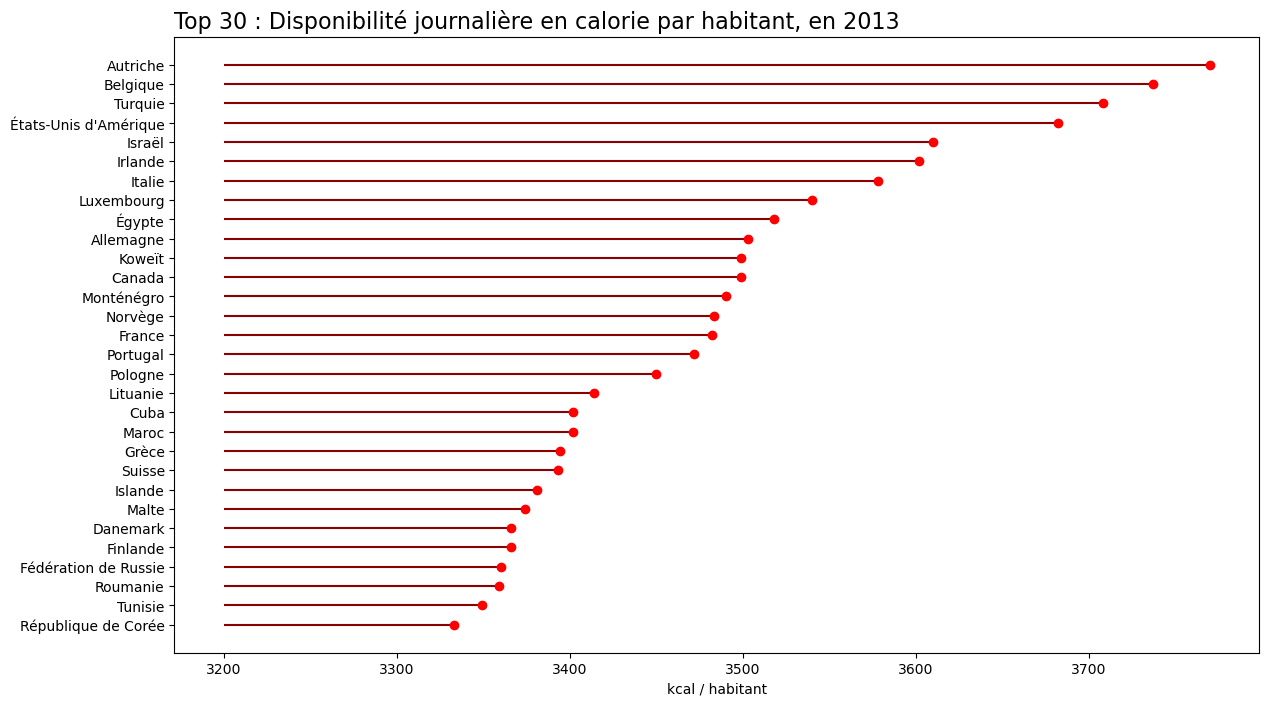

In [30]:
# Calorie - par personne - Top 30 
# Graphique lolipops: Graphs premier 30 pays en acces calories par habitants
ordered_kcalPays_Sum = Dispo_Alimentaire_Calorie_Sum.sort_values(by='Kcal/personne/jour')
Premier20 = ordered_kcalPays_Sum.tail(30)
Premier20 = Premier20.rename_axis("Pays").reset_index()
my_range=range(1,len(Premier20.index)+1)
plt.figure(figsize=(14,8)) # taille de la "feuille" (larg, hauteur)
 
# Graphique horizontal
plt.hlines(y=my_range, 
            xmin=3200, 
            xmax=Premier20['Kcal/personne/jour'],
            color='darkred')
plt.plot(Premier20['Kcal/personne/jour'], my_range, "o", color='red')

plt.yticks(my_range,Premier20['Pays'])# Add titles and axis names
plt.title(label="Top 30 : Disponibilité journalière en calorie par habitant, en 2013",
          loc='left',
          fontdict={"fontsize":16},
          )
plt.xlabel('kcal / habitant')
plt.ylabel('')
plt.savefig('Top 30 - Disponibilité en calorie par habitant et par jour en 2013.jpg',dpi=500)
# Show the plot
plt.show()

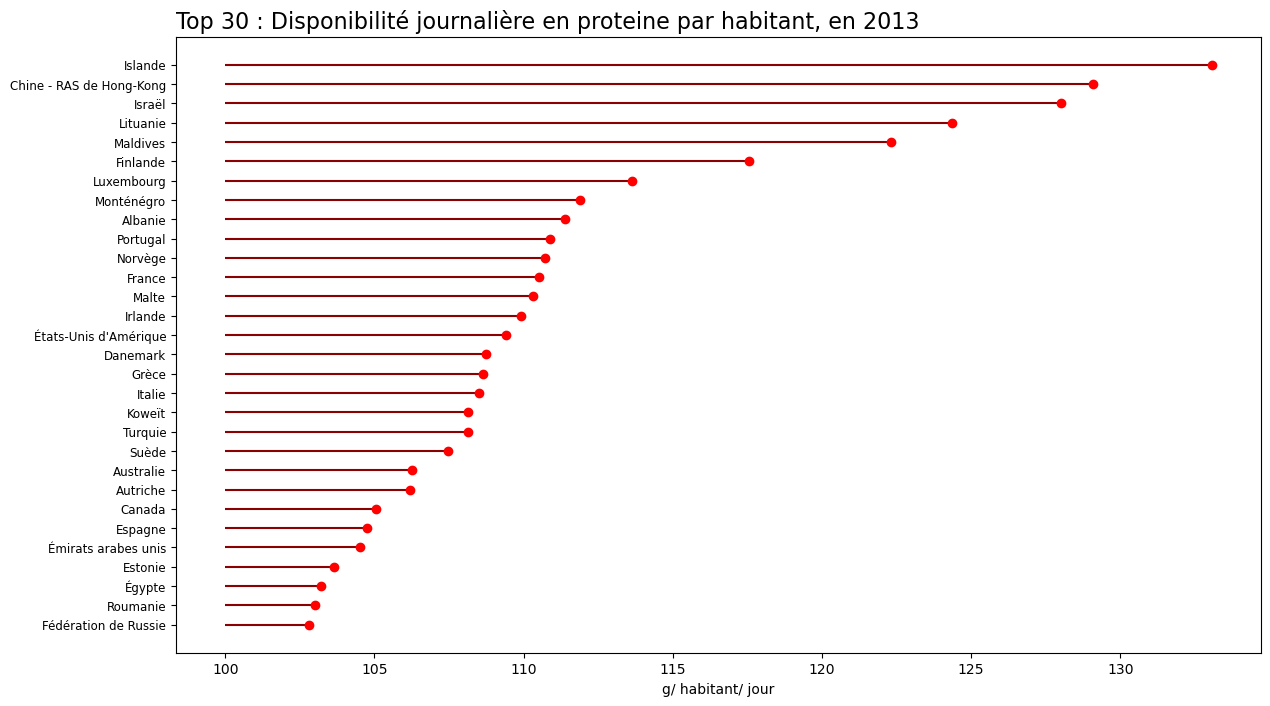

In [31]:
# Graphs Derniers 45 pays en acces calories par habitants

# Proteine - par personne - Top 30 
ordered_ProteinePays_Sum= Dispo_Alimentaire_Proteine_Sum.sort_values(by='g/personne/jour')
Premier30 = ordered_ProteinePays_Sum.tail(30)
Premier30 = Premier30.rename_axis("Pays").reset_index()
my_range=range(1,len(Premier30.index)+1)
plt.figure(figsize=(14,8)) # taille de la "feuille" (larg, hauteur)
# The horizontal plot is made using the hline function
plt.hlines(y=my_range,
            xmin=100, 
            xmax=Premier30['g/personne/jour'],
            color='darkred')
plt.plot(Premier30['g/personne/jour'], my_range, "o", color='red')
plt.yticks(my_range,Premier30['Pays'],color='black', size=8.5)
plt.title(label="Top 30 : Disponibilité journalière en proteine par habitant, en 2013",
          loc='left',
          fontdict={"fontsize":16},
          )
plt.xlabel('g/ habitant/ jour')
plt.ylabel('')
plt.savefig('Top 30 - Disponibilité en proteine par habitant et par jour en 2013.jpg',dpi=500)
# Show the plot
plt.show()

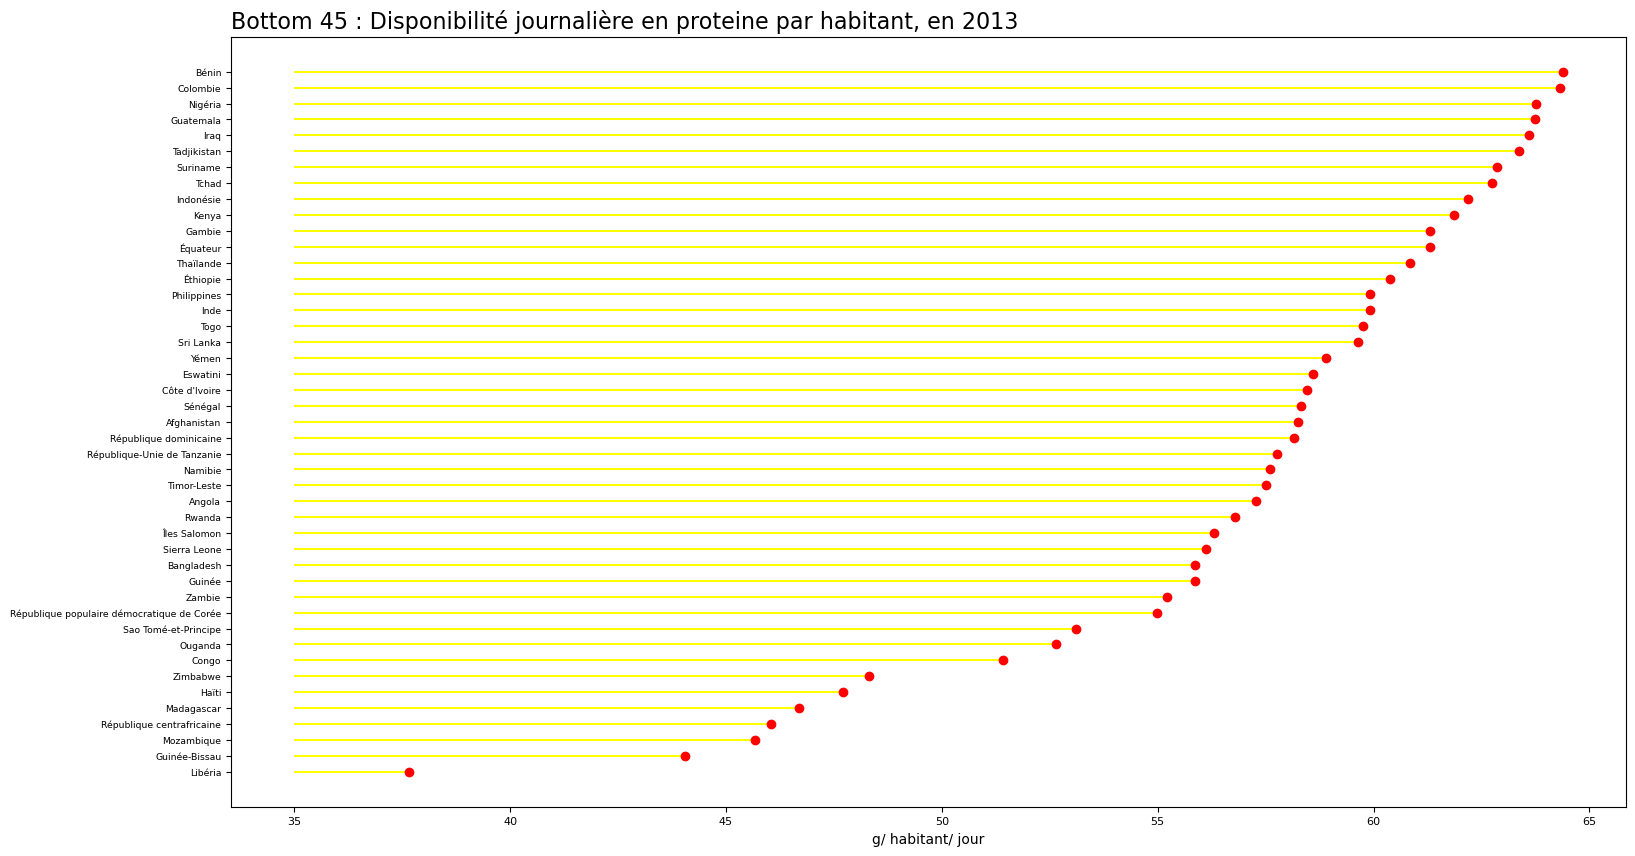

In [32]:
# Graphs Derniers 45 pays en acces Proteine par habitants
Dernier45 = ordered_ProteinePays_Sum.head(45)
Dernier45 = Dernier45.rename_axis("Pays").reset_index()
my_range=range(1,len(Dernier45.index)+1)
plt.figure(figsize=(18,10)) # taille de la "feuille" (larg, hauteur)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, 
            xmin=35, 
            xmax=Dernier45['g/personne/jour'],
            color='yellow')
plt.plot(Dernier45['g/personne/jour'], my_range, "o", color='red')

plt.yticks(my_range,Dernier45['Pays'],  color='black', size=6.7)# Add titles and axis names
plt.xticks(fontsize=8)
plt.title(label="Bottom 45 : Disponibilité journalière en proteine par habitant, en 2013",
          loc='left',
          fontdict={"fontsize":16},
          )
plt.xlabel('g/ habitant/ jour',color='black', size=10)
plt.ylabel('')
plt.savefig('Bottom 45 - Disponibilité en proteine par habitant et par jour en 2013.jpg',dpi=500)
# Show the plot
plt.show()

Produit :
Nous avions : 
Dispo_Alimentaire_Calorie & Dispo_Alimentaire_Proteine 

Calculer pour la planete, l'ensemble des proteines et des kcal par produit :

In [33]:


Dispo_Alimentaire_CalorieProduit_Sum= Dispo_Alimentaire_Calorie.groupby('Produit').sum('Kcal/personne/jour')# group by somme 
Dispo_Alimentaire_CalorieProduit_Sum= Dispo_Alimentaire_CalorieProduit_Sum.drop(columns=["habitant"])
Dispo_Alimentaire_CalorieProduit_Sum= Dispo_Alimentaire_CalorieProduit_Sum.drop(columns=["kcal/pays/2013"])
Dispo_Alimentaire_CalorieProduit_Sum=Dispo_Alimentaire_CalorieProduit_Sum.rename(columns={'Kcal/personne/jour':'Kcal/planete/jour'}) # changement du nom 
Dispo_Alimentaire_CalorieProduit_Sum=Dispo_Alimentaire_CalorieProduit_Sum.rename(columns={'Kcal/personne/an':'Kcal/planete/an'}) # changement du nom 

Dispo_Alimentaire_ProteineProduit_Sum= Dispo_Alimentaire_Proteine .groupby('Produit').sum('g/personne/jour')
Dispo_Alimentaire_ProteineProduit_Sum=Dispo_Alimentaire_ProteineProduit_Sum.drop(columns=["habitant"])
Dispo_Alimentaire_ProteineProduit_Sum=Dispo_Alimentaire_ProteineProduit_Sum.drop(columns=["kg/pays/2013"])
Dispo_Alimentaire_ProteineProduit_Sum=Dispo_Alimentaire_ProteineProduit_Sum.rename(columns={'g/personne/jour':'g/planete/jour'}) # changement du nom 
Dispo_Alimentaire_ProteineProduit_Sum=Dispo_Alimentaire_ProteineProduit_Sum.rename(columns={'kg/personne/jour':'kg/planete/jour'})
Dispo_Alimentaire_ProteineProduit_Sum=Dispo_Alimentaire_ProteineProduit_Sum.rename(columns={'kg/personne/an':'kg/planete/an'})
Dispo_Alimentaire_ProteineProduit_Sum=Dispo_Alimentaire_ProteineProduit_Sum.rename(columns={'g/personne/an':'g/planete/an'})

#-----Exporter-----------------------------------------------------------------------------------------------------------
Dispo_Alimentaire_ProteineProduit_Sum= pd.DataFrame(Dispo_Alimentaire_ProteineProduit_Sum)
# Dispo_Alimentaire_ProteineProduit_Sum.to_excel("Somme des proteines en disponibilité par produits.xlsx", sheet_name="Proteine", index=True)

Dispo_Alimentaire_CalorieProduit_Sum= pd.DataFrame(Dispo_Alimentaire_CalorieProduit_Sum)
# Dispo_Alimentaire_CalorieProduit_Sum.to_excel("Somme des calories en disponibilité par produit.xlsx", sheet_name="Proteine", index=True)

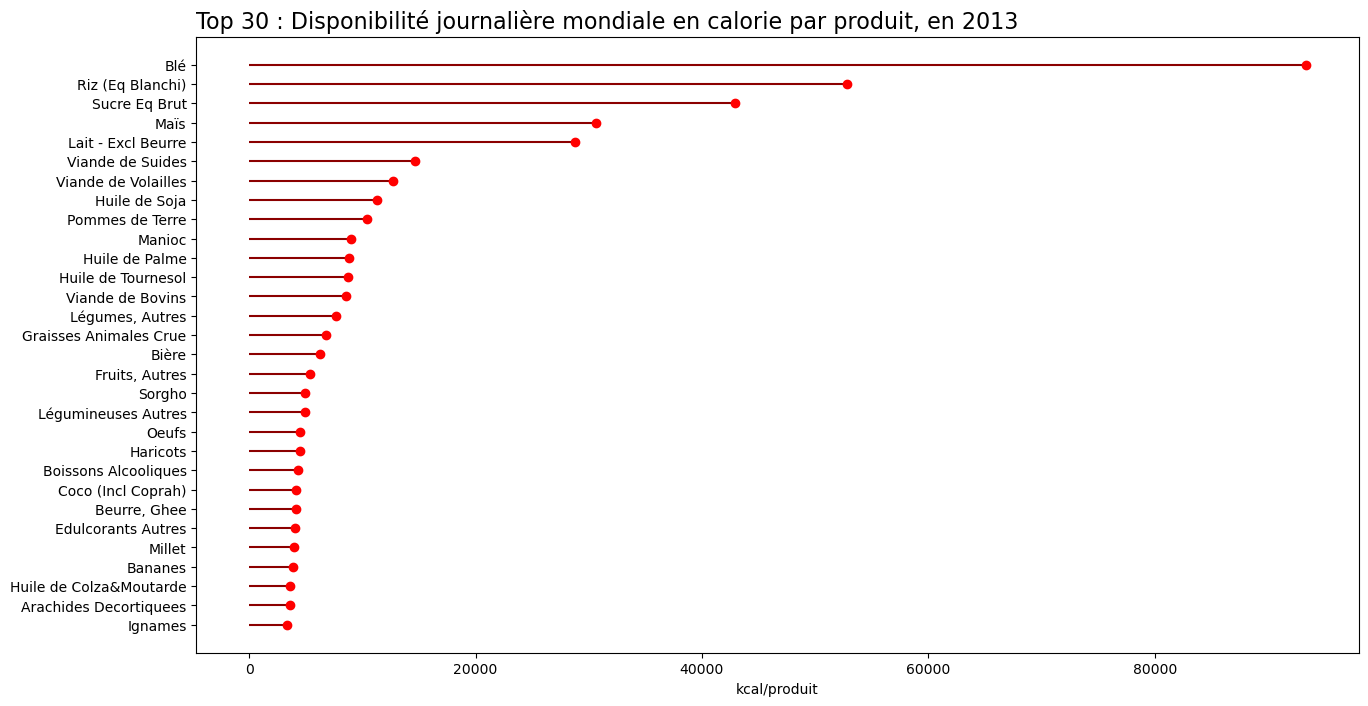

In [34]:
#Graphs premier 30 produits en  calories
ordered_Dispo_Alimentaire_CalorieProduit_Sum = Dispo_Alimentaire_CalorieProduit_Sum.sort_values(by='Kcal/planete/jour')
Premier30 = ordered_Dispo_Alimentaire_CalorieProduit_Sum.tail(30)
Premier30 = Premier30.rename_axis("Produits").reset_index()
my_range=range(1,len(Premier30.index)+1)
plt.figure(figsize=(15,8)) # taille de la "feuille" (larg, hauteur)
 
plt.hlines(y=my_range, 
            xmin=0, 
            xmax=Premier30['Kcal/planete/jour'],
            color='darkred')
plt.plot(Premier30['Kcal/planete/jour'], my_range, "o", color='red')
plt.yticks(my_range,Premier30['Produits'])# Add titles and axis names
plt.title(label="Top 30 : Disponibilité journalière mondiale en calorie par produit, en 2013",
          loc='left',
          fontdict={"fontsize":16},
          )
plt.xlabel('kcal/produit',color='black', size=10)
plt.ylabel('')
plt.savefig('Top 30 - Disponibilité journalière mondiale en calorie et par produit en 2013.jpg',dpi=500)
# Show the plot
plt.show() 

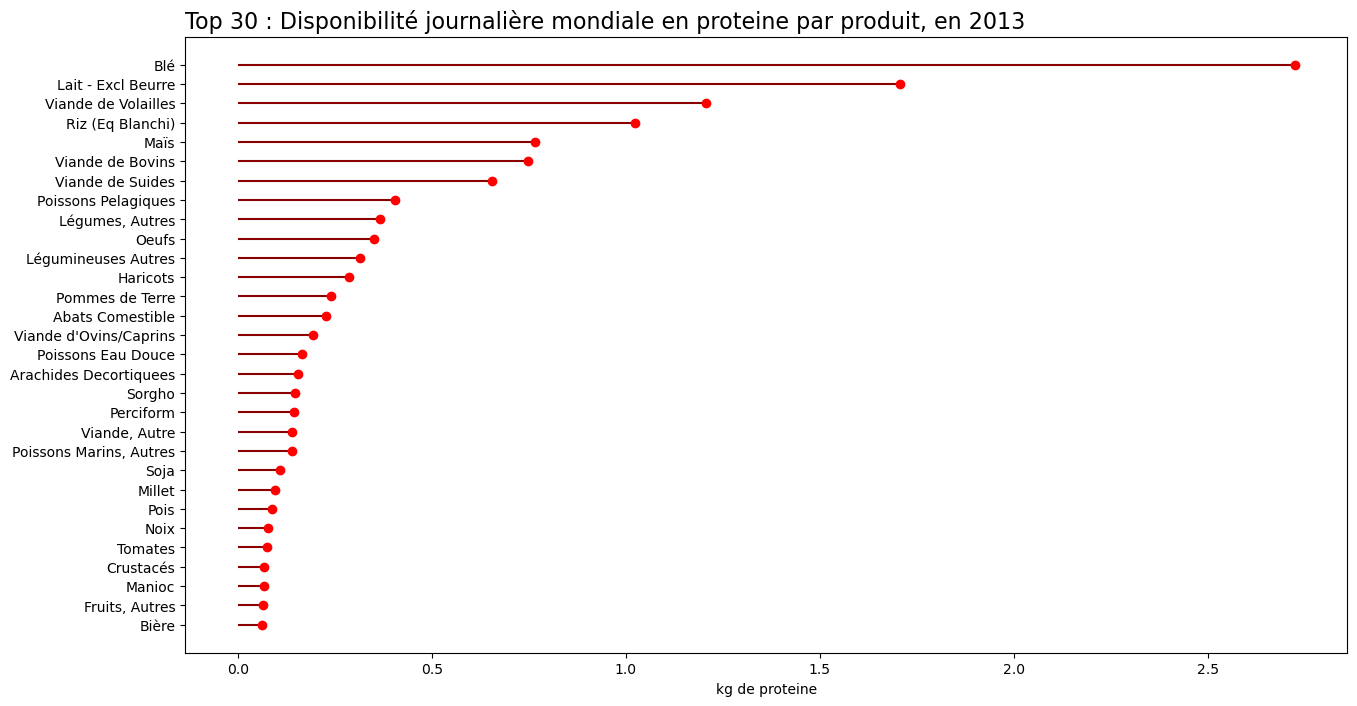

In [35]:

# Graphs premier 30 produits en proteines :
ordered_Dispo_Alimentaire_ProteineProduit_Sum = Dispo_Alimentaire_ProteineProduit_Sum.sort_values(by='kg/planete/jour')
Premier30 = ordered_Dispo_Alimentaire_ProteineProduit_Sum.tail(30)
Premier30 = Premier30.rename_axis("Produits").reset_index()
my_range=range(1,len(Premier30.index)+1)
plt.figure(figsize=(15,8)) # taille de la "feuille" (larg, hauteur)
 
plt.hlines(y=my_range, 
            xmin=0, 
            xmax=Premier30['kg/planete/jour'],
            color='darkred')
plt.plot(Premier30['kg/planete/jour'], my_range, "o", color='red')
plt.yticks(my_range,Premier30['Produits'])# Add titles and axis names
plt.title(label="Top 30 : Disponibilité journalière mondiale en proteine par produit, en 2013",
          loc='left',
          fontdict={"fontsize":16},
          )
plt.xlabel('kg de proteine',color='black', size=10)
plt.ylabel('')
plt.savefig('Top 30 - Disponibilité journalière mondiale en proteine et par produit en 2013.jpg',dpi=500)
# Show the plot
plt.show() 
    

### Question 4 : Ratio énergie/poids

 A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.


In [37]:

# Nous avions : 

#Dispo_Alimentaire_Calorie ok

Dispo_Alimentaire_Quantite_Produit =dispo[dispo['Code Élément'] == '645']# sous tableau avec que les quantites dispo
# Enlever les colonnes inutiles
Dispo_Alimentaire_Quantite_Produit= Dispo_Alimentaire_Quantite_Produit.drop(columns=["Unité","Code Élément","Élément"])
Dispo_Alimentaire_Quantite_Produit=Dispo_Alimentaire_Quantite_Produit.rename(columns={'Valeur':'kg/personne/an_645Quantite'}) # changement du nom de la colon valeur

Ratio=Dispo_Alimentaire_Calorie.merge(Dispo_Alimentaire_Quantite_Produit, on=['Pays','Produit'])
Ratio=Ratio.drop(columns=["habitant","Code Produit_y", 'kcal/pays/2013', 'Kcal/personne/jour'])
Ratio['Energie_Poids_Kcal/kg'] = Ratio['Kcal/personne/an'] / Ratio['kg/personne/an_645Quantite']

Ratio = Ratio.replace(np.inf,np.nan)
Ratio= Ratio.dropna(how='any')


# Data sur les oeufs : 
Ratio_Oeuf=Ratio[Ratio['Produit'] == 'Oeufs'] # sous tableau avec que les oeufs
Ratio_Mean_Oeuf= Ratio_Oeuf.groupby('Produit').mean('Energie_Poids_Kcal/kg')
print(Ratio_Mean_Oeuf['Energie_Poids_Kcal/kg'])
# Oeuf entier : 145 calories pour 100g, soit 1450 pour 1000g (1kg)

Produit
Oeufs    1364.156059
Name: Energie_Poids_Kcal/kg, dtype: float64


### Question 5 : Aliments les plus caloriques et protéiques

 En considérant les aliments végétaux et animaux, citez 5 aliments parmi les 20 aliments les plus caloriques,  en utilisant le ratio énergie/poids. 

In [39]:

Ratio_Mean= Ratio .groupby('Produit').mean('Energie_Poids_Kcal/kg')
Ratio_EnergiePoids_Mean= Ratio_Mean.drop(columns=["Kcal/personne/an", "kg/personne/an_645Quantite" ])# Sans les colonnes inutiles


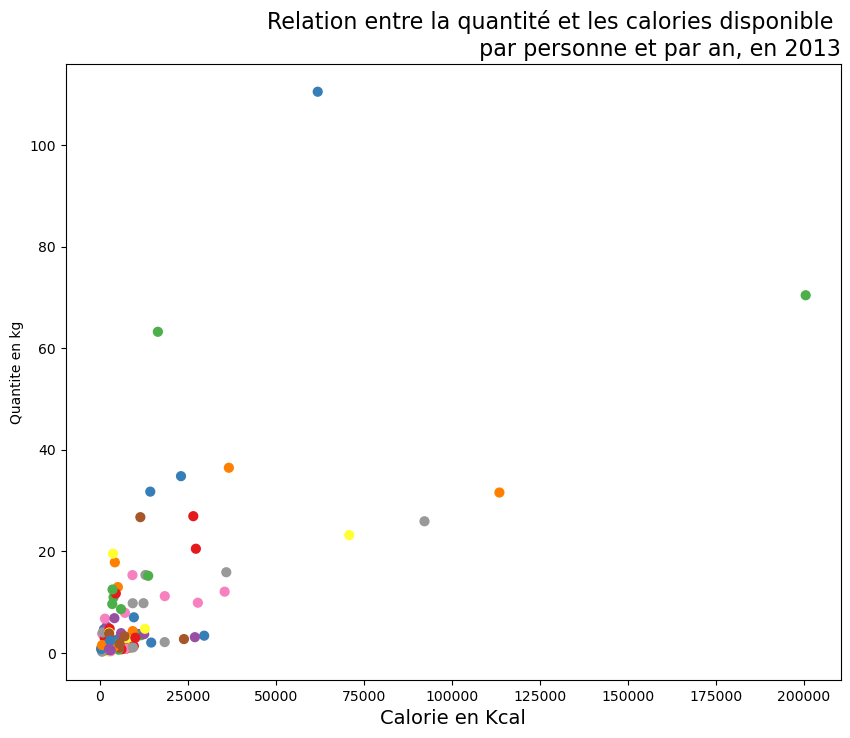

In [40]:
# Graphiques
color =sb.color_palette("Set1",
                        len(Ratio_Mean ["Energie_Poids_Kcal/kg"]))
z=Ratio_Mean.index
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

# Scatter plot (plot à point avec palette de couleur par défaut Viridis()
plt.scatter('Kcal/personne/an', 'kg/personne/an_645Quantite', s=40,c=color, data=Ratio_Mean)
plt.xlabel('Calorie en Kcal', size=14)
plt.ylabel('Quantite en kg')
plt.title(label="Relation entre la quantité et les calories disponible \n par personne et par an, en 2013",
          loc='right',
          fontdict={"fontsize":16},
          )

plt.show()




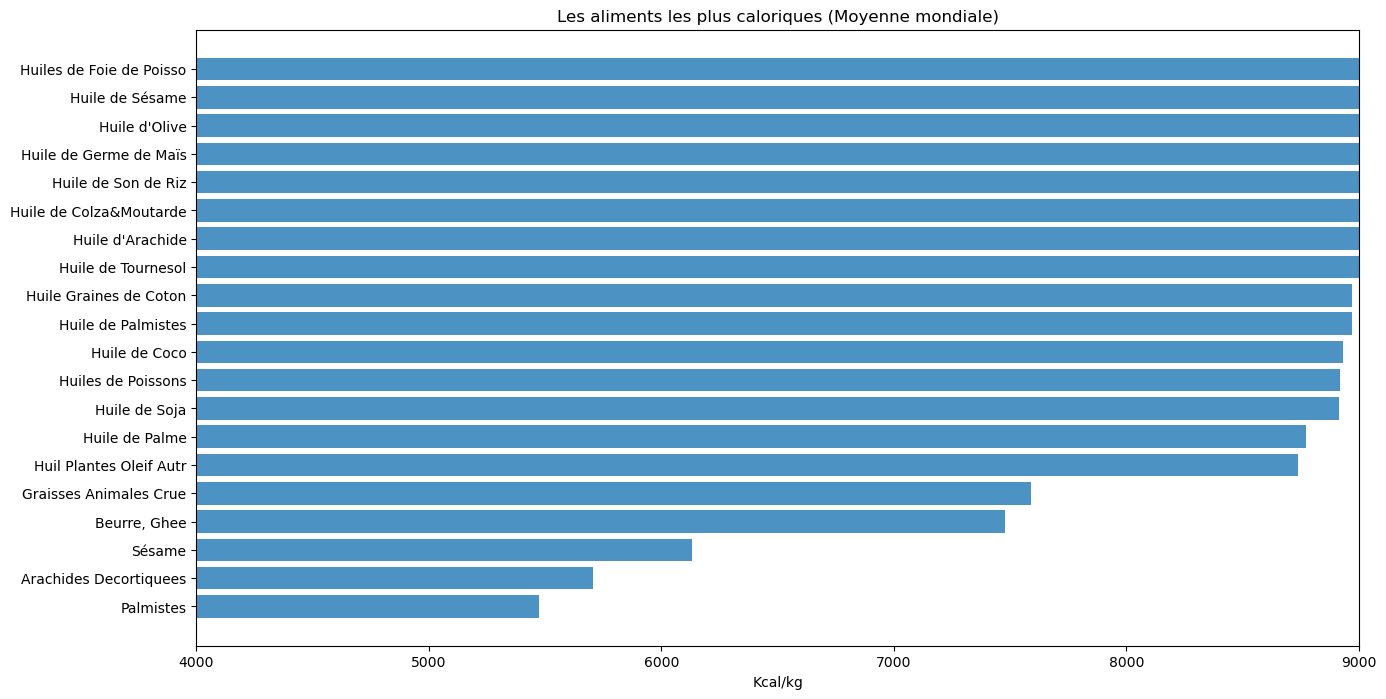

In [41]:
plt.figure(figsize=(15,8)) # taille de la "feuille" (larg, hauteur)
ordered_Ratio= Ratio_EnergiePoids_Mean.sort_values(by='Energie_Poids_Kcal/kg')# ordination
Premier20 = ordered_Ratio.tail(20) # Top 20.
y_pos = np.arange(len(Premier20))# taille de l axe y
# Graphique :
plt.barh(y_pos, 
          Premier20['Energie_Poids_Kcal/kg'],
          align='center', 
          alpha=0.8)
plt.xlim([4000, 9000]) 
plt.yticks(y_pos,Premier20.index)# legende y
plt.xlabel('Kcal/kg')# legence x
plt.title('Les aliments les plus caloriques (Moyenne mondiale)')# titre
plt.savefig('Top 20 - Les aliments les plus caloriques.jpg',dpi=500)
plt.show()



 5 Aliments riches : Huile de foie de Poisson, Huile de Sésame, Huile d'olive, Huile d'Arachide, Huile de Maïs

#### Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [42]:

# Table avec les données  : Disponibilité alimentaire en quantité (kg/personne/an)

# Dans le même tableau, les proteines et la quantite de produit : 
Ratio_Proteine= Dispo_Alimentaire_Proteine.merge(Dispo_Alimentaire_Quantite_Produit, on=['Pays', 'Produit'])
Ratio_Proteine=Ratio_Proteine.drop(columns=["habitant","Code Produit_y", 'kg/pays/2013', 'g/personne/an', 'g/personne/jour','kg/personne/jour'])

# Mise à jour des titres des colonnes entre les données sur les proteines (674) et celles sur les quantités (645)
Ratio_Proteine=Ratio_Proteine.rename(columns={'kg/personne/an':'kg/personne/2013_674'}) # changement du nom 674 = proteine

# Calculs des quantités de proteine par unite de matière de chaque produit en kg puis en gr.
Ratio_Proteine['RatioProteine'] = Ratio_Proteine['kg/personne/2013_674'] / Ratio_Proteine['kg/personne/an_645Quantite']
Ratio_Proteine['Proteine%'] = Ratio_Proteine['RatioProteine']*100

In [43]:
# Retraits des NAN et des inf.
Ratio_Proteine=Ratio_Proteine.replace(np.inf,np.nan)
Ratio_Proteine=Ratio_Proteine.dropna(how='any')

# sous tableau avec les quantités de produits moyen pour chaque produit, en disponibilité mondiale.
Ratio_ProteinePoids_Mean=Ratio_Proteine.groupby('Produit').mean('RatioProteine')
Ratio_ProteinePoids_Mean= Ratio_ProteinePoids_Mean.drop(columns=["kg/personne/2013_674", "kg/personne/an_645Quantite" ])# Sans les colonnes inutiles

# exporter : 
#Ratio_ProteinePoids_Mean.to_excel("Ratio_ProteinePoids_Mean.xlsx", sheet_name="Ratio", index=True)


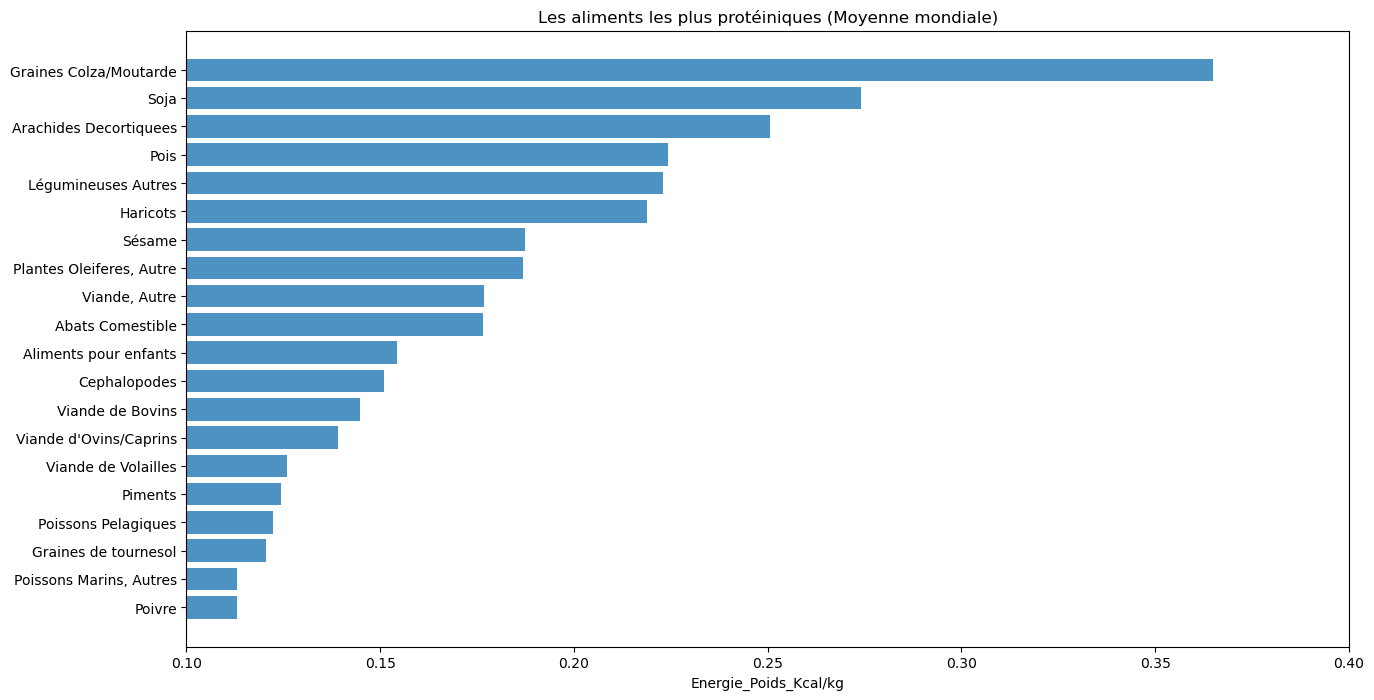

In [44]:
plt.figure(figsize=(15,8)) # taille de la "feuille" (larg, hauteur)
ordered_Ratio=Ratio_ProteinePoids_Mean.sort_values(by='RatioProteine')# ordination
Premier20 = ordered_Ratio.tail(20) # Top 20.
y_pos = np.arange(len(Premier20))# taille de l axe y
# Graphique :
plt.barh(y_pos, 
          Premier20['RatioProteine'],
          align='center', 
          alpha=0.8)
plt.xlim([0.10, 0.4]) 
plt.yticks(y_pos,Premier20.index)# legende y
plt.xlabel('Energie_Poids_Kcal/kg')# legence x
plt.title('Les aliments les plus protéiniques (Moyenne mondiale)')# titre
plt.savefig('Top 20 - Les aliments les plus protéiniques.jpg',dpi=500)
plt.show()

### Question 6 : Dispo. intérieure mondiale des végétaux.
Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal. 

In [46]:
# dispoV pour la disponibilité intérieur :

Dispo_IntV=dispoV[dispoV['Code Élément'] == '5301'] # sous tableau avec que les dispo Veg
# # J'ajoute une colonne avec la valeur en gr
Dispo_IntV['kg/pays/an_5301'] = Dispo_IntV['Valeur'] * 1000000

# Mise à jour des titres des colonnes entre les données 
Dispo_IntV=Dispo_IntV.rename(columns={'Valeur':'Milliers_Tonnes_5301'}) # changement du nom 

## Nous avons la table Ratio de l'energie avec une colonne en kcal / kg pour chaque produit et chaque pays.

# Dans le même tableau, les kcal et la quantite de produit : 
Dispo_IntV_Calorie= Dispo_IntV.merge(Ratio, on=['Pays','Produit'])
# Enlever les colonnes inutiles
Dispo_IntV_Calorie= Dispo_IntV_Calorie.drop(columns=["Unité","Code Produit_x","Milliers_Tonnes_5301", "Élément","Kcal/personne/an","kg/personne/an_645Quantite"])

# Pour vérifier liste des produits : 
# ListeProduitDispoMondiale=set(Dispo_IntV_Calorie["Produit"].values.tolist())
# print("Nombre de produits Végétals disponibilité alimentaire : ",len(ListeProduitDispoMondiale)) # 68
# print(ListeProduitDispoMondiale) 

# # J'ajoute une colonne avec la valeur en kg
Dispo_IntV_Calorie['DispoCaloriePays_kcal'] =Dispo_IntV_Calorie['kg/pays/an_5301'] * Dispo_IntV_Calorie['Energie_Poids_Kcal/kg']

Total_dispKcal_Veg_Mondial = round((Dispo_IntV_Calorie["DispoCaloriePays_kcal"].sum()),0)
print(f'La disponibilité mondiale en kcal avec que les aliments d origine vegetal en 2013, est de: \n, {int(Total_dispKcal_Veg_Mondial):,} kcal.'.replace(',', ' '))


La disponibilité mondiale en kcal avec que les aliments d origine vegetal en 2013  est de: 
  11 978 112 189 662 878 kcal.


### Question 7 : Potentiel alimentaire des végétaux

Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? 

Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [48]:
# Nous avons déjà : 
Nbr_Habitant_Planete2013 =round(int((Total - Chine)*1000),0)
print(f'La population mondiale en 2013 était de {Nbr_Habitant_Planete2013:,},habitants'.replace(',', ' '))

# Pour se nourrir un homme à besoin, chaque jour, de 1 440 à 2 030 kilo-calories, et une femme entre 1 100 et 1 500.
MoyenneBassekcal = round(int(((1440 *365)+(1100*365))/2),0)
MoyenneHautekcal =round(int(((2030*365)+(1500*365))/2),0)

# Calcul du nombre d'humain pouvant être nourris : Calories
MoyenneBasse_Humain_NourrisVegKcal = round(int(Total_dispKcal_Veg_Mondial / MoyenneBassekcal),0)
MoyenneHaute_Humain_NourrisVegKcal = round(int(Total_dispKcal_Veg_Mondial / MoyenneHautekcal),0)

print(f'\nLe nombre d humain pouvant être nourris (en calorie) en 2013 avec la disponibilité intérieure mondiale de produits \n végétaux était de {MoyenneHaute_Humain_NourrisVegKcal:,} à {MoyenneBasse_Humain_NourrisVegKcal:,},habitants'.replace(',', ' '))

# En pourcentage de la population mondiale.
PourcentagePopu_Mondiale_Veget_kcal_basse = round(int((MoyenneBasse_Humain_NourrisVegKcal*100)/Nbr_Habitant_Planete2013),0)
PourcentagePopu_Mondiale_Veget_kcal_haute = round(int((MoyenneHaute_Humain_NourrisVegKcal*100)/Nbr_Habitant_Planete2013),0)

print(f' \nSoit entre plus de {PourcentagePopu_Mondiale_Veget_kcal_haute} % et {PourcentagePopu_Mondiale_Veget_kcal_basse}%'.replace(',', ' '))

# ici

# Calcul du nombre d'humain pouvant être nourris : Proteines
## Nous avons la tableQuantite de proteine avec une colonne en cal / gr pour chaque produit et chaque pays
# Mettre dans le même tableau, les proteines et la quantite de produit : 
Dispo_IntV_Proteine = Dispo_IntV.merge(Ratio_Proteine, on=['Pays', 'Produit'])
# Enlever les colonnes inutiles
Dispo_IntV_Proteine= Dispo_IntV_Proteine.drop(columns=["Unité","Code Produit_x", "Élément","Milliers_Tonnes_5301","kg/personne/2013_674","kg/personne/an_645Quantite","Proteine%" ])

# J'ajoute une colonne avec la valeur en kg.
Dispo_IntV_Proteine['Dispo_Proteine'] =(Dispo_IntV_Proteine['kg/pays/an_5301'] * Dispo_IntV_Proteine['RatioProteine'])

Total_dispoProteine_Veg_Mondial = round(int(Dispo_IntV_Proteine["Dispo_Proteine"].sum()))
print(f'\nLa disponibilité mondiale en proteine avec que les aliments d origine vegetal en 2013 est de {int(Total_dispoProteine_Veg_Mondial):,} .'.replace(',', ' '))

# On peut également en déduire que les apports recommandés en proteine sont d’environ 50 – 138 g par jour pour une femme,
# et 62 – 170 g pour un homme. 
# Attention passer en kg les valeurs en proteine
# Il s’agit cependant de moyennes :
MoyenneBasseProteine = round(int(((0.050*365)+(0.062*365))/2),0)
MoyenneHauteProteine =round(int(((0.138*365)+(0.170*365))/2),0)

# Calcul du nombre d'humain pouvant être nourris.
MoyenneBasse_Humain_NourrisVegProteine = round(int(Total_dispoProteine_Veg_Mondial/MoyenneBasseProteine),0)
MoyenneHaute_Humain_NourrisVegProteine = round(int(Total_dispoProteine_Veg_Mondial/MoyenneHauteProteine),0)
print(f'\nLe nombre d humain pouvant être nourris, en 2013 avec la disponibilité intérieure mondiale de produits végétaux était de {MoyenneHaute_Humain_NourrisVegProteine:,} à {MoyenneBasse_Humain_NourrisVegProteine:,},habitants.'.replace(',', ' '))

# En pourcentage de la population mondiale.
PourcentagePopu_Mondiale_Veget_Proteine_basse =round((MoyenneBasse_Humain_NourrisVegProteine*100)/Nbr_Habitant_Planete2013,2)
PourcentagePopu_Mondiale_Veget_Proteine_haute = round((MoyenneHaute_Humain_NourrisVegProteine*100)/Nbr_Habitant_Planete2013,2)
print(f' \nSoit entre plus de {PourcentagePopu_Mondiale_Veget_Proteine_haute} % et {PourcentagePopu_Mondiale_Veget_Proteine_basse}%.'.replace(',', ' '))


La population mondiale en 2013 était de 7 248 628 125 habitants

Le nombre d humain pouvant être nourris (en calorie) en 2013 avec la disponibilité intérieure mondiale de produits 
 végétaux était de 18 593 057 068 à 25 839 957 263 habitants
 
Soit entre plus de 256 % et 356%

La disponibilité mondiale en proteine avec que les aliments d origine vegetal en 2013 est de 288 588 518 495 .

Le nombre d humain pouvant être nourris  en 2013 avec la disponibilité intérieure mondiale de produits végétaux était de 5 153 366 401 à 14 429 425 924 habitants.
 
Soit entre plus de 71.09 % et 199.06%.


### Question 8 : Potentiel alimentaire des végétaux (destinés aux animaux pertes)

Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? 
Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [50]:
# Nous avons : 
# dispoV pour la disponibilité intérieur :
   
IndispoPerteAnimaux=dispoV.loc[(dispoV['Code Élément']=='5123')|(dispoV['Code Élément']=='5521')|(dispoV['Code Élément']=='5142')]
IndispoPerteAnimaux=IndispoPerteAnimaux.rename(columns={'Valeur':'Milliers_Tonnes'})#Mise à jour des titres des colonnes entre les données 
IndispoPerteAnimaux['kg/pays/an'] = IndispoPerteAnimaux['Milliers_Tonnes'] *1000000#  J'ajoute une colonne

# ----Les proteines :  

# Dans le même tableau, les proteines et la quantite de produit :
IndispoPerteAnimaux_Sum = IndispoPerteAnimaux.groupby('Produit').sum('kg/pays/an')# group by somme 
IndispoPerteAnimaux_Sum=IndispoPerteAnimaux_Sum.rename(columns={'kg/pays/an':'kg/planete/an'})#Mise à jour des titres des colonnes entre les données 
IndispoPerteAnimaux_Sum= Ratio_ProteinePoids_Mean.merge(IndispoPerteAnimaux_Sum, on=['Produit'])

#colonne = IndispoPerteAnimaux_Sum.columns # connaitre les titres des colonnes pour les enlever
#print(colonne)
IndispoPerteAnimaux_Sum= IndispoPerteAnimaux_Sum.drop(columns=["Milliers_Tonnes",
                                                               "Proteine%"])# Sans les colonnes inutiles
IndispoPerteAnimaux_Sum =IndispoPerteAnimaux_Sum[(IndispoPerteAnimaux_Sum.RatioProteine > 0) ]# Que les valeures positives

# # J'ajoute une colonne avec la valeur en kg
IndispoPerteAnimaux_Sum['indispo_Proteine'] =(IndispoPerteAnimaux_Sum['kg/planete/an'] * IndispoPerteAnimaux_Sum['RatioProteine'])
Total_indispoProteine_Veg_Mondial = round(int(IndispoPerteAnimaux_Sum["indispo_Proteine"].sum()),0)
print(f'\nL indisponibilité mondiale en proteine avec que les aliments d origine vegetale est de: {Total_indispoProteine_Veg_Mondial:,} kg.'.replace(',', ' '))

# Calcul du nombre d'humain pouvant être nourris, si pas de pertes.
MoyenneBasse_Humain_Pouvant_NourrisVegProteine = round(int(Total_indispoProteine_Veg_Mondial /MoyenneBasseProteine),0)
MoyenneHaute_Humain_Pouvant_NourrisVegProteine = round(int(Total_indispoProteine_Veg_Mondial/MoyenneHauteProteine),0)
print(f'Le nombre d humain pouvant être nourris avec l indisponibilité intérieure mondiale de proteine de produits végétaux était de , {MoyenneHaute_Humain_Pouvant_NourrisVegProteine:,} à {MoyenneBasse_Humain_Pouvant_NourrisVegProteine:,},habitants.'.replace(',', ' '))

# En pourcentage de la population mondiale.
PourcentagePopu_Mondiale_si_dispo_perteVeget_Proteine_basse = round((MoyenneBasse_Humain_Pouvant_NourrisVegProteine*100)/Nbr_Habitant_Planete2013,2)
PourcentagePopu_Mondiale_si_dispo_perteVeget_Proteine_haute = round((MoyenneHaute_Humain_Pouvant_NourrisVegProteine*100)/Nbr_Habitant_Planete2013,2)

print(f'\nSoit entre plus de {PourcentagePopu_Mondiale_si_dispo_perteVeget_Proteine_haute} % et {PourcentagePopu_Mondiale_si_dispo_perteVeget_Proteine_basse}% de la population mondiale'.replace(',', ' '))


L indisponibilité mondiale en proteine avec que les aliments d origine vegetale est de: 215 507 557 629 kg.
Le nombre d humain pouvant être nourris avec l indisponibilité intérieure mondiale de proteine de produits végétaux était de   3 848 349 243 à 10 775 377 881 habitants.

Soit entre plus de 53.09 % et 148.65% de la population mondiale


In [51]:
# ---------- Les calories :  
# Dans le même tableau, les calories et la quantite de produit :

IndispoPerteAnimaux_Sum_Calories= Ratio_EnergiePoids_Mean.merge(IndispoPerteAnimaux_Sum, on=['Produit'])

#colonne = IndispoPerteAnimaux_Sum.columns # connaitre les titres des colonnes pour les enlever
#print(colonne)
IndispoPerteAnimaux_Sum_Calories= IndispoPerteAnimaux_Sum_Calories.drop(columns=["indispo_Proteine",
                                                               "RatioProteine"])# Sans les colonnes inutiles

IndispoPerteAnimaux_Sum_Calories['indispo_Calorie'] =(IndispoPerteAnimaux_Sum_Calories['kg/planete/an'] *IndispoPerteAnimaux_Sum_Calories['Energie_Poids_Kcal/kg'])
Total_indispoCalorie_Veg_Mondial = round(int(IndispoPerteAnimaux_Sum_Calories["indispo_Calorie"].sum()),0)
print(f'L indisponibilité mondiale en calorie (avec que les aliments d origine vegetal) en 2013, est de: {Total_indispoCalorie_Veg_Mondial:,} Kcal.'.replace(',', ' '))

# Calcul du nombre d'humain pouvant être nourris : Calories, si pas de pertes.
MoyenneBasse_Humain_Pouvant_NourrisVegCalorie = round(int(Total_indispoCalorie_Veg_Mondial/MoyenneBassekcal),0)
MoyenneHaute_Humain_Pouvant_NourrisVegCalorie = round(int(Total_indispoCalorie_Veg_Mondial/MoyenneHautekcal),0)
print(f'\nLe nombre d humain pouvant être nourris en 2013 avec l indisponibilité intérieure mondiale de calorie (de produits végétaux)\nétait de {MoyenneHaute_Humain_Pouvant_NourrisVegCalorie:,} à {MoyenneBasse_Humain_Pouvant_NourrisVegCalorie:,},habitants'.replace(',', ' '))

# En pourcentage de la population mondiale.
PourcentagePopu_Mondiale_si_dispo_perteVeget_Calorie_basse = round((MoyenneBasse_Humain_Pouvant_NourrisVegCalorie*100)/Nbr_Habitant_Planete2013,2)
PourcentagePopu_Mondiale_si_dispo_perteVeget_Calorie_haute = round((MoyenneHaute_Humain_Pouvant_NourrisVegCalorie*100)/Nbr_Habitant_Planete2013,2)

print(f'\nSoit entre plus de {PourcentagePopu_Mondiale_si_dispo_perteVeget_Calorie_haute} % et {PourcentagePopu_Mondiale_si_dispo_perteVeget_Calorie_basse}% de la population mondiale.'.replace(',', ' '))

L indisponibilité mondiale en calorie (avec que les aliments d origine vegetal) en 2013  est de: 8 989 954 119 363 603 Kcal.

Le nombre d humain pouvant être nourris en 2013 avec l indisponibilité intérieure mondiale de calorie (de produits végétaux)
était de 13 954 680 615 à 19 393 709 673 habitants

Soit entre plus de 192.51 % et 267.55% de la population mondiale.


### Question 9 : Potentiel alimentaire de la dispo. Mondiale
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? 

In [53]:
# Nous avons :
    # Dispo_Alimentaire_Calorie (pour le monde)
    # Dipo_Alimentaire_Proteine (pour le monde)
Total_Dispo_AlimentaireMonde_kCalorie  = int(Dispo_Alimentaire_Calorie ["kcal/pays/2013"].sum())
Total_Dispo_AlimentaireMonde_Proteine  = int(Dispo_Alimentaire_Proteine ["kg/pays/2013"].sum())

# Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la 
# population mondiale.

# Calcul du nombre d'humain pouvant être nourris pendant 1 an _ 1 - Proteine
MoyenneBasse_Humain_Nourris_DispoMond_Proteine = round(int(Total_Dispo_AlimentaireMonde_Proteine/ MoyenneBasseProteine),0)
MoyenneHaute_Humain_Nourris_DispoMond_Proteine = round(int(Total_Dispo_AlimentaireMonde_Proteine / MoyenneHauteProteine),0)

print(f'\nLe nombre d humain pouvant être nourris en 2013 avec la disponibilité intérieure mondiale était de {MoyenneBasse_Humain_Nourris_DispoMond_Proteine:,} à {MoyenneHaute_Humain_Nourris_DispoMond_Proteine:,},habitants.'.replace(',', ' '))

# En pourcentage de la population mondiale.
PourcentagePopu_Mondiale_dispo_Proteine_basse = round(((MoyenneBasse_Humain_Nourris_DispoMond_Proteine*100)/Nbr_Habitant_Planete2013),2)
PourcentagePopu_Mondiale_dispo_Proteine_haute = round(((MoyenneHaute_Humain_Nourris_DispoMond_Proteine*100)/Nbr_Habitant_Planete2013),2)

print(f'\nSoit entre plus de {PourcentagePopu_Mondiale_dispo_Proteine_haute} % et {PourcentagePopu_Mondiale_dispo_Proteine_basse} % de la population mondiale.'.replace(',', ' '))



Le nombre d humain pouvant être nourris en 2013 avec la disponibilité intérieure mondiale était de 10 283 138 736 à 3 672 549 548 habitants.

Soit entre plus de 50.67 % et 141.86 % de la population mondiale.


In [54]:

####  Calcul du nombre d'humain pouvant être nourris pendant 1 an _ 1 - Calorie ---- 
MoyenneBasse_Humain_Nourris_DispoMond_Calorie = round(int(Total_Dispo_AlimentaireMonde_kCalorie/ MoyenneBassekcal),0)
MoyenneHaute_Humain_Nourris_DispoMond_Calorie = round(int(Total_Dispo_AlimentaireMonde_kCalorie/ MoyenneHautekcal),0)

print(f'\nLe nombre d humain pouvant être nourris en 2013 avec la disponibilité intérieure mondiale en calorie était de {MoyenneBasse_Humain_Nourris_DispoMond_Calorie:,} à {MoyenneHaute_Humain_Nourris_DispoMond_Calorie:,},habitants.'.replace(',', ' '))

# En pourcentage de la population mondiale.
PourcentagePopu_Mondiale_dispo_Calorie_basse = round(((MoyenneBasse_Humain_Nourris_DispoMond_Calorie*100)/Nbr_Habitant_Planete2013),2)
PourcentagePopu_Mondiale_dispo_Calorie_haute = round(((MoyenneHaute_Humain_Nourris_DispoMond_Calorie*100)/Nbr_Habitant_Planete2013),2)

print(f'Soit entre plus de {PourcentagePopu_Mondiale_dispo_Calorie_haute} % et {PourcentagePopu_Mondiale_dispo_Calorie_basse}% de la population mondiale.'.replace(',', ' '))


Le nombre d humain pouvant être nourris en 2013 avec la disponibilité intérieure mondiale en calorie était de 15 804 425 901 à 11 372 023 169 habitants.
Soit entre plus de 156.89 % et 218.03% de la population mondiale.


### Question 10 : Proportion de la sous-nutrition mondiale : Les inégalités alimentaires à l'échelle mondiale
Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [56]:
dispo_ssAli= pd.read_csv("FAOSTAT_2013_sous_alimentation.csv",
                dtype={'Valeur':np.float64},
                converters={"Code zone": str,"Code année": str, "Code Élément": str, "Code Produit": str },
                decimal='.')

# Le fichier d’insécurité alimentaire inclut 14 variables: 
#     Le code domaine et sa traduction Domaine : ici, nous sommes dans la sécurité alimentaire,
#     Le zone, et sa traduction Zone,
#     Le code Element et sa traduction Element, les deux colonnes contiennent des valeurs uniques,
#     Le code produit et le produit étudié, les deux colonnes contiennent des valeurs uniques,
#     Le code année, qui représente l'interval de 3 années : 2012 - 2014 et sa traduction Année
#     Les unités,
#     La valeur = le nombre de personnes en sous-alimentation en millions d’habitants,
#     Le symbole et sa traduction avec la colonne Description du symbole.


In [57]:
# Sous alimentation : 

summary_across_rows = pd.DataFrame(dispo_ssAli).describe() 
ListePays_ss_popu=set(dispo_ssAli["Zone"].values.tolist())
print("Nombre de pays dans la table polulation en sous-nutritions: ",len(ListePays_ss_popu)) # Attention il y a 204 pays.

# Nous avons donc les données de sous-nutritions pour 204 sur les 235 pays du monde. 
# ATTENTION les valeurs <0.1, sont notees ici 0.1

Nombre de pays dans la table polulation en sous-nutritions:  204


In [58]:
dispo_ssAli.set_index("Zone", inplace=True) # Passage de Pays en index
dispo_ssAli_2013 = dispo_ssAli.drop('Chine') # On enlève la Chine 
dispo_ssAli_2013['Pays'] = dispo_ssAli_2013.index
# Simplifier les tables :
dispo_ssAli_2013= dispo_ssAli_2013.drop(columns=["Code Domaine","Domaine", "Produit","Code Produit","Domaine", "Code zone", "Année", "Code année"])
dispo_ssAli_2013=dispo_ssAli_2013.rename(columns={'Valeur':'Million'})#Mise à jour des titres des colonnes entre les données 
dispo_ssAli_2013['Personne'] = dispo_ssAli_2013['Million'] *1000000#  J'ajoute une colonne Personne
dispo_ssAli_2013= dispo_ssAli_2013.drop(columns=["Unité","Élément","Code Élément"])

dispo_ssAli_2013['Estimation'] =dispo_ssAli_2013['Symbole'].replace('<', '', regex=True)
dispo_ssAli_2013['Estimation'] =dispo_ssAli_2013['Estimation'].str.replace('F', '0')
dispo_ssAli_2013['Estimation'] =dispo_ssAli_2013['Estimation'].str.replace('NV', '0')
dispo_ssAli_2013['Estimation'] = dispo_ssAli_2013['Estimation'].astype('float32')
dispo_ssAli_2013['Estimation-Millions'] = dispo_ssAli_2013['Estimation'] *1000000# 

In [59]:
# Calcul sous population :
Total_sousPop_Estimation = int(dispo_ssAli_2013["Estimation-Millions"].sum())
Total_sousPop_Basse = int(dispo_ssAli_2013["Personne"].sum())

NbrPopulation_SousA=Total_sousPop_Basse+Total_sousPop_Estimation
print(f'Le nombre d humain sous alimenté, en 2013 d après la FAO , {Total_sousPop_Basse :,} à {NbrPopulation_SousA:,},habitants'.replace(',', ' '))

# En pourcentage de la population mondiale.
PourcentagePopu_Mondiale_SousA_EstiH = round(((NbrPopulation_SousA*100)/Nbr_Habitant_Planete2013),3)
PourcentagePopu_Mondiale_SousA_EstiB = round(((Total_sousPop_Basse*100)/Nbr_Habitant_Planete2013),3)
print(f' Soit entre plus de {PourcentagePopu_Mondiale_SousA_EstiB} % et {PourcentagePopu_Mondiale_SousA_EstiH}%'.replace(',', ' '))

Le nombre d humain sous alimenté  en 2013 d après la FAO   739 700 000 à 782 500 000 habitants
 Soit entre plus de 10.205 % et 10.795%


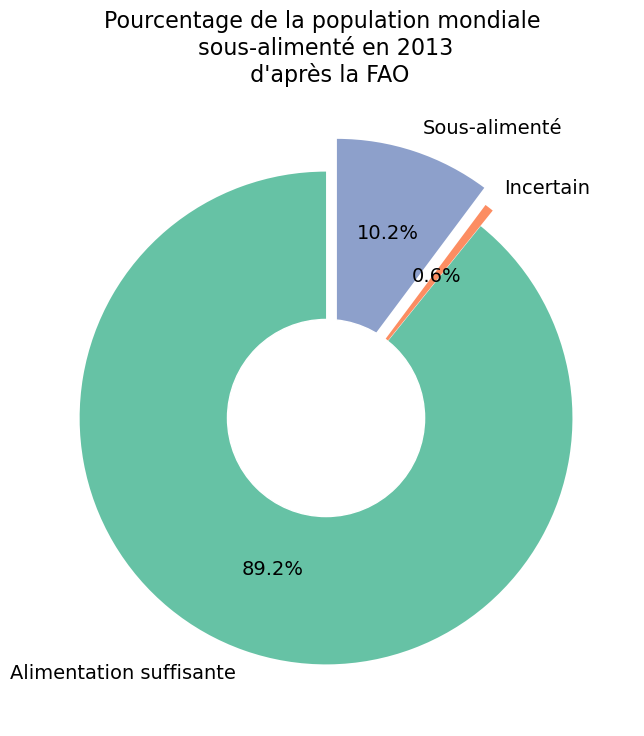

In [60]:
RatioA=100-PourcentagePopu_Mondiale_SousA_EstiH
RatioB=(100-PourcentagePopu_Mondiale_SousA_EstiB)-RatioA
RatioC=100-RatioA-RatioB

# create data
plt.figure(figsize=(10,8)) # taille de la "feuille" (larg, hauteur)
size_of_groups=[RatioA,RatioB,RatioC]
# Créer un cercle au centre du graph
my_circle = plt.Circle((0,0), 0.4, color='white')
# explosion
explosion = (0, 0.08, 0.14) # 0 pour l alimentation et 0.008 pour les sous alimentes et les incertains (permets de faire resortir)
# Couleurs
plt.pie(size_of_groups, 
        labels=['Alimentation suffisante', 'Incertain', 'Sous-alimenté'], 
        colors=sb.color_palette('Set2'),
        autopct='%1.1f%%',
        pctdistance=0.65,
        explode=explosion, 
        labeldistance=1.1,
        textprops={'fontsize':14}, # taille du texte des étiquettes
        startangle=90,
        )
p = plt.gcf()
p.gca().add_artist(my_circle)

# Titre
plt.title(label="Pourcentage de la population mondiale \n sous-alimenté en 2013 \n d'après la FAO",
              fontdict={"fontsize":16},
              pad=20)
plt.savefig('Pourcentage de la population en sous-alimentation.jpg',dpi=500)
# Show the graph
plt.show()

### Question extra : Proportion de la sous-nutrition mondiale en 2016 et 2019  : 

In [ ]:
dispo_ssAli2016= pd.read_csv("FAOSTAT_20162019_sous_alimentation.csv", 
                             sep=';',dtype={'Valeur':np.float64},
                             converters={"Code Pays": str,"Code Année": str, "Code Élément": str, "Code Produit": str },
                             decimal='.')

popu_1619= pd.read_csv("FAOSTAT_2016-2019_population.csv", 
                       encoding='latin-1',
                       sep=';',
                       dtype={'Valeur':np.float64},
                       converters={"Code Année": str, "Code Élément": str, "Zone": str },
                       decimal='.')

In [ ]:
# Sous alimentation : 
ListePays_ss_popu2016=set(dispo_ssAli2016["Zone"].values.tolist())
print("Nombre de pays dans la table polulation en sous-nutritions : ",len(ListePays_ss_popu2016)) # Attention il y a 204 pays.

# Nous avons donc les données de sous-nutritions pour 204 sur les 235 pays du monde. Comme pour 2013.
dispo_ssAli2016.set_index("Zone", inplace=True) # Passage de Pays en index
dispo_ssAli_2016 = dispo_ssAli2016.drop('Chine') # On enlève la Chine 
dispo_ssAli_2016['Zone'] = dispo_ssAli_2016.index

# Simplifier les tables :
dispo_ssAli_2016= dispo_ssAli_2016.drop(columns=["Code Domaine","Code zone (M49)", "Domaine", "Produit","Code Produit","Domaine", "Symbole","Description du Symbole", "Code année"])
dispo_ssAli_2016=dispo_ssAli_2016.rename(columns={'Valeur':'Million'})#Mise à jour des titres des colonnes entre les données 
dispo_ssAli_2016['Personne'] = dispo_ssAli_2016['Million'] *1000000#  J'ajoute une colonne Personne
dispo_ssAli_2016= dispo_ssAli_2016.drop(columns=["Unité","Élément","Code Élément"])

# Calcul sous population :
Total_sousPop_2016 = dispo_ssAli_2016[dispo_ssAli_2016["Année"] =='2015-2017']["Personne"].sum()
Total_sousPop_2019 = dispo_ssAli_2016[dispo_ssAli_2016["Année"] =='2018-2020']["Personne"].sum()
print(f'Le nombre d humain sous alimenté était de :  \n en 2016 : {Total_sousPop_2016 :,}\n  en 2019 : {Total_sousPop_2019 :,}, d après la FAO '.replace(',', ' '))

In [ ]:
# Nous avons donc les données de sous-nutritions pour 204 sur les 235 pays du monde. Comme pour 2013.
popu_1619.set_index("Zone", inplace=True) # Passage de Pays en index
popu_1619=popu_1619.drop('Chine') # On enlève la Chine 
popu_1619['Zone'] = popu_1619.index

# # En pourcentage de la population mondiale.
popu_1619['Personne'] = popu_1619['Valeur'] *1000#  J'ajoute une colonne Personne
Total_Pop_2016=popu_1619[popu_1619["Année"] ==2016]["Personne"].sum()
Total_Pop_2019=popu_1619[popu_1619["Année"] ==2019]["Personne"].sum()

PourcentagePopu_Mondiale_SousA_2016 = round(((Total_sousPop_2016*100)/Total_Pop_2016),3)
PourcentagePopu_Mondiale_SousA_2019 = round(((Total_sousPop_2019*100)/Total_Pop_2019),3)
print(f' Soit en 2016 {PourcentagePopu_Mondiale_SousA_2016} % et en 2019, {PourcentagePopu_Mondiale_SousA_2019}%'.replace(',', ' '))

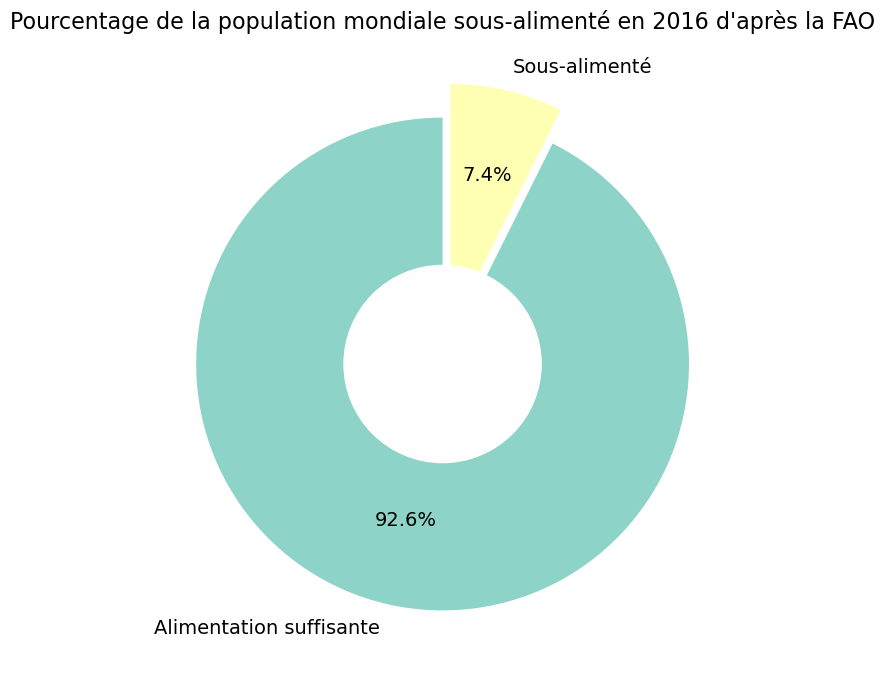

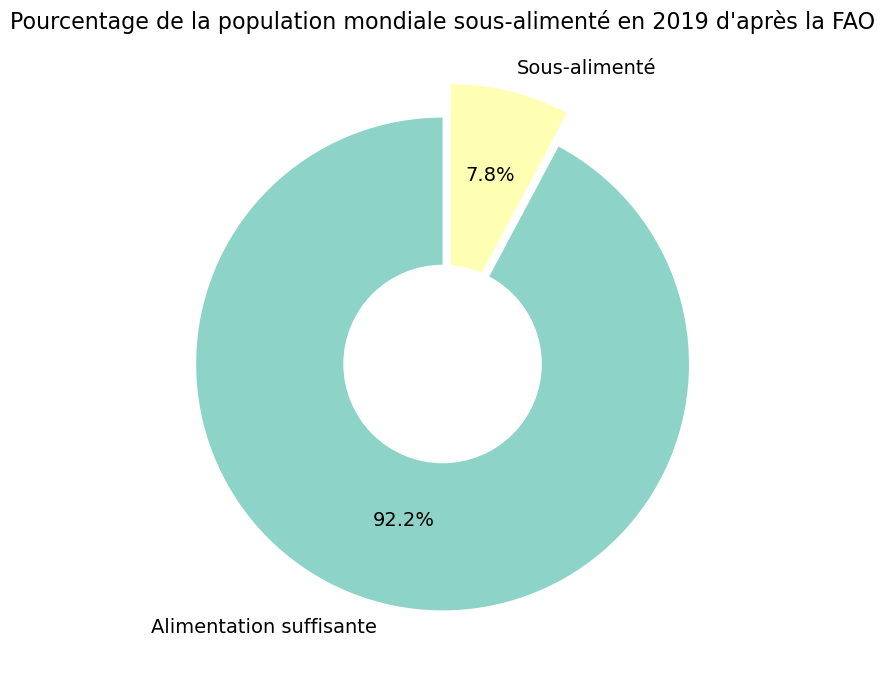

In [63]:
# create data 2016
RatioA=100-PourcentagePopu_Mondiale_SousA_2016
RatioB=100-RatioA

plt.figure(figsize=(10,8)) # taille de la "feuille" (larg, hauteur)
size_of_groups=[RatioA,RatioB]
# Créer un cercle au centre du graph
my_circle = plt.Circle((0,0), 0.4, color='white')
# explosion
explosion = (0,0.14) # 0 pour l alimentation et 0.008 pour les sous alimentes et les incertains (permets de faire resortir)
# Couleurs
plt.pie(size_of_groups, 
        labels=['Alimentation suffisante', 'Sous-alimenté'], 
        colors=sb.color_palette('Set3'),
        autopct='%1.1f%%',
        pctdistance=0.65,
        explode=explosion, 
        labeldistance=1.1,
        textprops={'fontsize':14}, # taille du texte des étiquettes
        startangle=90,
        )
p = plt.gcf()
p.gca().add_artist(my_circle)

# Titre
plt.title(label="Pourcentage de la population mondiale sous-alimenté en 2016 d'après la FAO",
              fontdict={"fontsize":16},
              pad=20)
plt.savefig('Pourcentage de la population en sous-alimentation 2016.jpg',dpi=500)
# Show the graph
plt.show()

# create data 2019
RatioA=100-PourcentagePopu_Mondiale_SousA_2019
RatioB=100-RatioA

plt.figure(figsize=(10,8)) # taille de la "feuille" (larg, hauteur)
size_of_groups=[RatioA,RatioB]
# Créer un cercle au centre du graph
my_circle = plt.Circle((0,0), 0.4, color='white')
# explosion
explosion = (0,0.14) # 0 pour l alimentation et 0.008 pour les sous alimentes et les incertains (permets de faire resortir)
# Couleurs
plt.pie(size_of_groups, 
        labels=['Alimentation suffisante', 'Sous-alimenté'], 
        colors=sb.color_palette('Set3'),
        autopct='%1.1f%%',
        pctdistance=0.65,
        explode=explosion, 
        labeldistance=1.1,
        textprops={'fontsize':14}, # taille du texte des étiquettes
        startangle=90,
        )
p = plt.gcf()
p.gca().add_artist(my_circle)

# Titre
plt.title(label="Pourcentage de la population mondiale sous-alimenté en 2019 d'après la FAO",
              fontdict={"fontsize":16},
              pad=20)
# plt.savefig('Pourcentage de la population en sous-alimentation 2019.jpg',dpi=500)
# Show the graph
plt.show()

### Question 11 : Céréales : proportion destinée à l'alimentation animale 

In [90]:
#dispoC= dispoC.drop(columns=["Code Domaine","Domaine", "Description du Symbole", "Symbole","Domaine",  "Année",  "Code Année"])
dispoC.set_index("Pays", inplace=True) # Passage de Pays en index
dispoC = dispoC.drop('Chine') # On enlève la Chine 
dispoC =dispoC[(dispoC.Valeur > 0) ]

# Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO. 

# Nous avons : dispoC
ListeCereales = dispoC.reset_index()
ListeCereales= ListeCereales.drop(columns=["Valeur","Unité","Élément","Code Élément","Pays"])
ListeCereales= ListeCereales[~ListeCereales.duplicated()]# garder qu'une valeur par colonne

KeyError: "None of ['Pays'] are in the columns"

En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [67]:
# Aliments pour Animaux = 5521 et Nourriture = 5142

CerealesAnimaux=dispoC[dispoC['Code Élément'] == '5521'] # sous tableau avec que les Aliments Animaux
Total_CerealesAnimaux = int(CerealesAnimaux["Valeur"].sum())

CerealesHumain=dispoC[dispoC['Code Élément'] == '5142'] # sous tableau avec que la nourriture Humaine
Total_CerealesHumain = int(CerealesHumain["Valeur"].sum())
# calculs Ratio : 
CerealeAlimentation=Total_CerealesHumain+Total_CerealesAnimaux
RatioHumainCereales = round(((Total_CerealesHumain*100)/CerealeAlimentation),2)
RatioAnimauxCereales = round(((Total_CerealesAnimaux*100)/CerealeAlimentation),2)

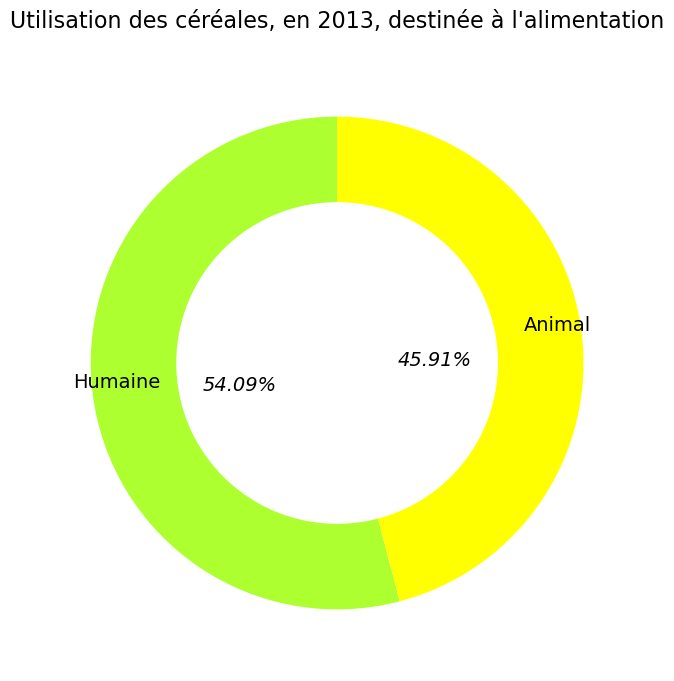

In [69]:
plt.figure(figsize=(10,8)) # taille de la "feuille" (larg, hauteur)
size_of_groups=[RatioHumainCereales,RatioAnimauxCereales]
# Créer un cercle au centre du graph
my_circle = plt.Circle( (0,0), 0.65, color='white') # couleur et taille, et localisation

patches, texts, autotexts =plt.pie(size_of_groups, 
        labels=['Humaine', 'Animal'], 
        labeldistance=0.9,
        colors=['#ADFF2F', '#FFFF00'],
        autopct='%1.2f%%',
        pctdistance=0.4, #a distance de l etiquette dans le cercle
        textprops={'fontsize':14}, # taille du texte des étiquettes
        startangle=90,
        )
for text in texts:
    text.set_horizontalalignment('center') # Placer les etiquettes legendes au milieu
    text.set_verticalalignment('bottom')
for autotext in autotexts:                 # Placer les etiquettes % au milieu et en italiques
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('top')
    autotext.set_fontstyle('italic') 
    
p = plt.gcf()
p.gca().add_artist(my_circle)
# Titre
plt.title(label="Utilisation des céréales, en 2013, destinée à l'alimentation", 
              fontdict={"fontsize":16},
              pad=20)
plt.savefig('Proportion des céréales destinée à l alimentation.jpg',dpi=500)
# Show the graph
plt.show()

### Question 12 : 
Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.

### Question 13 : 
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [73]:
USA_AlimAnimaux_Cereales= dispoC[(dispoC['Code Pays']=='231')]
USA_AlimAnimaux_Cereales= USA_AlimAnimaux_Cereales[(USA_AlimAnimaux_Cereales["Élément"]=="Aliments pour animaux")]
Total_USA_AlimAnimaux_Cereale = int(USA_AlimAnimaux_Cereales["Valeur"].sum()) # milliers de tonnes
Total_USA_AlimAnimaux_Cereale10 = (Total_USA_AlimAnimaux_Cereale/10)
print(f"{Total_USA_AlimAnimaux_Cereale10} milliers de tonnes de céréales, qui correspondent à 10 % de la production de céreales des USA, pourraient être libérés.")

14009.6 milliers de tonnes de céréales, qui correspondent à 10 % de la production de céreales des USA, pourraient être libérés.


### Question 14 : Thaïlande - Choix nationnal de l utilisation des produits
En Thaïlande, quelle proportion de manioc est exportée ? 

In [78]:
Thailande_dispoV=dispoV.query("Pays == 'Thaïlande'")
Thailande_dispoManioc= Thailande_dispoV[(Thailande_dispoV['Produit']=='Manioc')]

Thailande_Production_Manioc = list(Thailande_dispoManioc.query("Élément=='Production'")["Valeur"])[0]
Thailande_Exportation_Manioc = list(Thailande_dispoManioc.query("Élément=='Exportations - Quantité'")["Valeur"])[0]
Ratio_Manioc_Thailande = round(((Thailande_Exportation_Manioc*100)/Thailande_Production_Manioc),2)
print(f'La production de Manioc en Thaïlande en 2013 était de,{int(Thailande_Production_Manioc,):,}, milliers de tonnes.'.replace(',', ' '))
print(f"Cependant le pays exporte {int(Thailande_Exportation_Manioc ,):,}, milliers de tonnes - soit {int(Ratio_Manioc_Thailande,):,}% du Manioc.".replace(',', ' '))


La production de Manioc en Thaïlande en 2013 était de 30 228  milliers de tonnes.
Cependant le pays exporte 25 214  milliers de tonnes - soit 83% du Manioc.


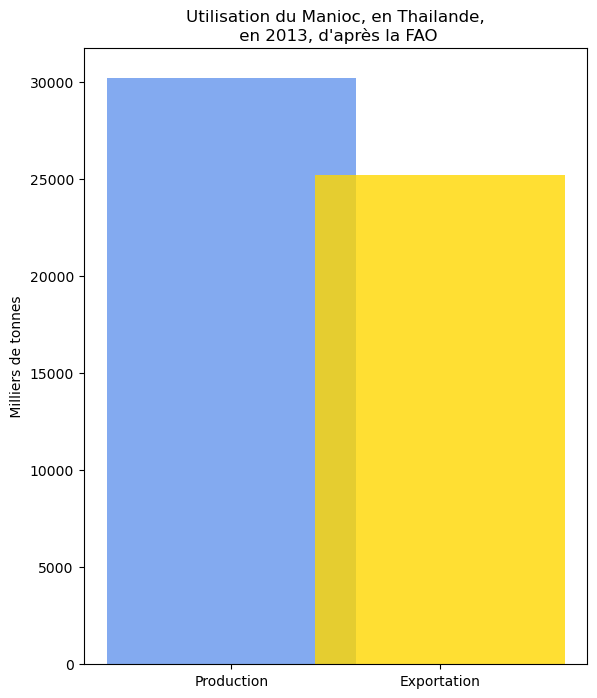

In [79]:
fig = plt.figure(figsize =(6.5, 8)) # taille de la "feuille" (larg, hauteur)
Manioc = ['Production', 'Exportation']
x= [Thailande_Production_Manioc,Thailande_Exportation_Manioc]
colors=['cornflowerblue', 'gold']
plt.bar(Manioc, x, 
        align='center', 
        width=1.2, 
        alpha=0.8, 
        color=colors)
# Show top values 
plt.ylabel(' Milliers de tonnes ')# legende

plt.title("Utilisation du Manioc, en Thailande,\n en 2013, d'après la FAO")# titre
plt.savefig('Utilisation du manioc en Thailande 2013.jpg',dpi=500)
# Show the graph
plt.show()

In [82]:
# Quelle est la proportion de personnes en sous-nutrition?
Thailande_Popu_ssAli = list(dispo_ssAli_2013.query("Pays=='Thaïlande'")["Personne"])[0]
print(f'Population sous alimenté en Thaïlande = {int(Thailande_Popu_ssAli,):,}, habitants.'.replace(',', ' '))

Thailande_Popu = PopulationM.query("Pays=='Thaïlande'")["habitant"] #
Thailande_Popu= list(Thailande_Popu)[0]
print(f'Population total en Thaïlande = {int(Thailande_Popu,):,}, habitants.'.replace(',', ' '))

Ratio_SSAli_Thailande = round(((Thailande_Popu_ssAli*100)/Thailande_Popu),2)
print(f'Ratio de la population sous alimente en Thaïlande = {Ratio_SSAli_Thailande:,}%'.replace(',', ' '))

Population sous alimenté en Thaïlande = 6 100 000  habitants.
Population total en Thaïlande = 69 578 600  habitants.
Ratio de la population sous alimente en Thaïlande = 8.77%


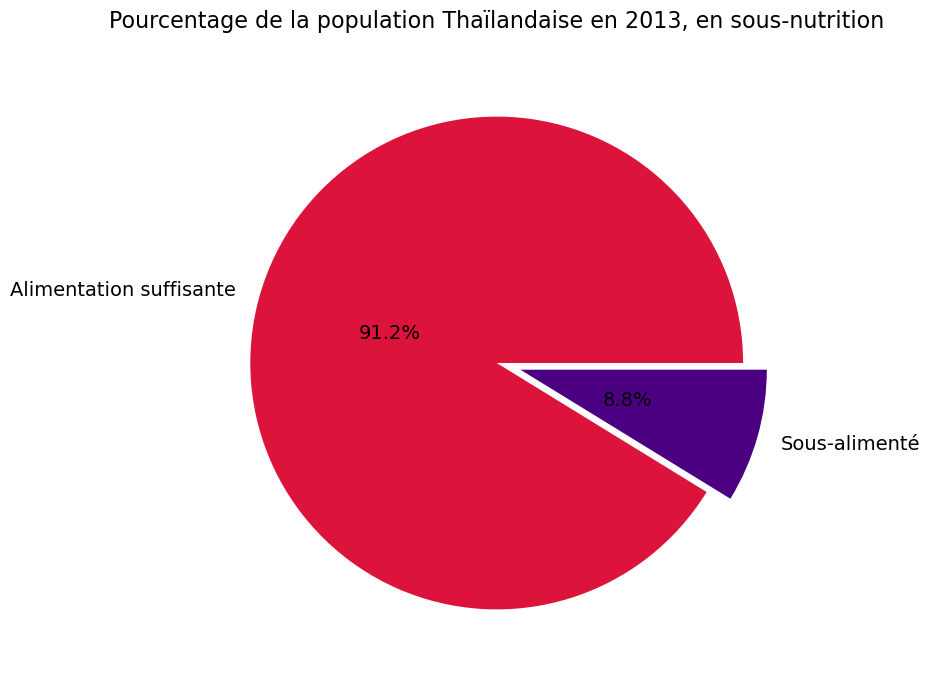

In [84]:
# Graphique Pie
size_of_groups=[(100-Ratio_SSAli_Thailande),Ratio_SSAli_Thailande]
plt.figure(figsize=(10,8)) # taille de la "feuille" (larg, hauteur)
# Couleurs
plt.pie(size_of_groups, 
        labels=['Alimentation suffisante', 'Sous-alimenté'], 
        labeldistance=1.1, # distance des étiquettes labels du cercle
        colors=['crimson','indigo'],# matplotlib named colors 'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',
        autopct='%1.1f%%',# %% pour afficher les %, 1f pour avoir les chiffre à une valeure apres la virgule
        pctdistance=0.45, # distance des etiquettes %
        textprops={'fontsize':14}, # taille du texte des étiquettes
        explode= [0, 0.1], 
        startangle=0,# Angle pour commencer la "tarte"
        )
p = plt.gcf()
# Titre
plt.title(
    label='Pourcentage de la population Thaïlandaise en 2013, en sous-nutrition', 
    fontdict={"fontsize":16},
    pad=20)
plt.savefig('Pourcentage de la population Thaïlandaise en sous-alimentation.jpg',dpi=500)
# Show the graph
plt.show()